# Data Wrangling With Pandas

## Introduction to Data Wrangling

Data wrangling, often known as **data cleaning or preprocessing**, is the process of transforming raw data into a structured, clean, and analysis-ready format. It involves a series of operations such as parsing, cleaning, validating, and transforming data to address issues like missing values, duplicates, and inconsistent formatting.


**Why It Matters**:
- **Quality and Accuracy**: The accuracy of any analysis, modeling, or decision-making is highly dependent on the quality of the input data. Data wrangling ensures that the data is accurate, consistent, and reliable.
- **Efficiency**: Clean and well-structured data reduces the time and computational resources needed for subsequent analysis, improving overall workflow efficiency.
- **Foundation for Analysis**: Just as a building requires a solid foundation, effective data analysis requires well-prepared data. Poor data quality can lead to erroneous insights and misinformed decisions.


**Common Data Issues Encountered During Wrangling**:
- **Missing Values**: Data points that are absent or unrecorded in the dataset. Can lead to biases or errors in statistical analyses and machine learning models if not handled appropriately.
- **Duplicates**: Repeated records or entries that appear more than once in the dataset. Can inflate the importance of certain data points, skewing results and analyses.
- **Outliers**: Data points that differ significantly from other observations, often due to variability or errors. They can distort statistical measures (mean, standard deviation) and lead to misinterpretations.
- **Inconsistent Formatting**: Variations in data presentation such as date formats, capitalization, or numerical representations. Inconsistent data can hinder accurate aggregation, filtering, and analysis.
- **Erroneous Data**: Incorrect or illogical data entries that may need correction or removal.
- **Noise**: Random errors or irrelevant information embedded in the dataset.

Data cleaning tasks are often reported to take up 80% or more of an analyst’s time. Fortunately, pandas, along with the built-in Python language features, provides you with a high-level, flexible, and fast set
of tools to enable you to manipulate data into the right form.

In [517]:
from pathlib import Path

import numpy as np
import pandas as pd


We can start by reading the data into pandas.

In [518]:
# Dataset 1: laptops
dataset_path_laptops = Path.cwd().parent / "data" / "INPUT_laptops.csv"  # dataset encoding is Latin-1
laptops = pd.read_csv(dataset_path_laptops, encoding="Latin-1")
laptops.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price (Euros)
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,"1339,69"
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,"898,94"
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,"575,00"
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,"2537,45"
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,"1803,60"


In [519]:
# Dataset 2: f500
dataset_path = Path.cwd().parent / "data" / "f500.csv"
f500 = pd.read_csv(dataset_path)
f500.head()

,company,rank,revenues,revenue_change,profits,assets,profit_change,ceo,industry,sector,previous_rank,country,hq_location,website,years_on_global_500_list,employees,total_stockholder_equity
0,Walmart,1,485873,0.8,13643.0,198825,-7.2,C. Douglas McMillon,General Merchandisers,Retailing,1,USA,"Bentonville, AR",http://www.walmart.com,23,2300000,77798
1,State Grid,2,315199,-4.4,9571.3,489838,-6.2,Kou Wei,Utilities,Eenergy,2,China,"Beijing, China",http://www.sgcc.com.cn,17,926067,209456
2,Sinopec Group,3,267518,-9.1,1257.9,310726,-65.0,Wang Yupu,Petroleum Refining,Energy,4,China,"Beijing, China",http://www.sinopec.com,19,713288,106523
3,China National Petroleum,4,262573,-12.3,1867.5,585619,-73.7,Zhang Jianhua,Petroleum Refining,Energy,3,China,"Beijing, China",http://www.cnpc.com.cn,17,1512048,301893
4,Toyota Motor,5,254694,7.7,16899.3,437575,-12.3,Akio Toyoda,Motor Vehicles and Parts,Motor Vehicles & Parts,8,Japan,"Toyota, Japan",http://www.toyota-global.com,23,364445,157210


## Data Inspection and Basic Manipulations

Before diving into advanced analyses, it is crucial to understand the structure and quality of your data. Pandas provides a rich set of tools to quickly inspect, summarize, and manipulate datasets. 

### Data Inspection

Check the size, number of rows and columns, of the dataset.

In [520]:
print(f"Number of rows: {laptops.shape[0]}")
print(f"Number of columns: {laptops.shape[1]}")
print(f"Column names: {laptops.columns}")

Number of rows: 1303
Number of columns: 13
Column names: Index(['Manufacturer', 'Model Name', 'Category', 'Screen Size', 'Screen',
       'CPU', 'RAM', ' Storage', 'GPU', 'Operating System',
       'Operating System Version', 'Weight', 'Price (Euros)'],
      dtype='object')


Show the first 3 rows of the dataset.

In [521]:
laptops.head(3)

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price (Euros)
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,"1339,69"
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,"898,94"
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,"575,00"


Show the last 3 rows of the dataset.

In [522]:
laptops.tail(3)

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price (Euros)
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,"14.0""",1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows,10,1.5kg,"229,00"
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,"15.6""",1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows,10,2.19kg,"764,00"
1302,Asus,X553SA-XX031T (N3050/4GB/500GB/W10),Notebook,"15.6""",1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows,10,2.2kg,"369,00"


Show 3 random rows:

In [523]:
laptops.sample(3)  # Randomly sample n rows from the DataFrame,
# useful for getting a diverse glimpse of the data.

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price (Euros)
879,HP,ProBook 450,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4GB,256GB SSD,Intel HD Graphics 620,Windows,10,2.04kg,"839,00"
1266,HP,Pavilion 15-AW003nv,Notebook,"15.6""",Full HD 1920x1080,AMD A9-Series 9410 2.9GHz,6GB,1TB Hybrid,AMD Radeon R7 M440,Windows,10,2.04kg,"549,99"
987,Lenovo,Legion Y520-15IKBN,Gaming,"15.6""",IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows,10,2.5kg,"1189,00"


Displays the data type of each column, which is crucial for ensuring proper data manipulation and analysis.

In [524]:
laptops.dtypes

Manufacturer                object
Model Name                  object
Category                    object
Screen Size                 object
Screen                      object
CPU                         object
RAM                         object
 Storage                    object
GPU                         object
Operating System            object
Operating System Version    object
Weight                      object
Price (Euros)               object
dtype: object

Show the dataset information. Provides a concise summary of the DataFrame, including the number of non-null entries, data types of each column, and memory usage.

In [525]:
laptops.info(memory_usage="deep")  # memory_usage="deep" to get the exact memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Manufacturer              1303 non-null   object
 1   Model Name                1302 non-null   object
 2   Category                  1302 non-null   object
 3   Screen Size               1303 non-null   object
 4   Screen                    1303 non-null   object
 5   CPU                       1303 non-null   object
 6   RAM                       1303 non-null   object
 7    Storage                  1303 non-null   object
 8   GPU                       1303 non-null   object
 9   Operating System          1303 non-null   object
 10  Operating System Version  1133 non-null   object
 11  Weight                    1303 non-null   object
 12  Price (Euros)             1303 non-null   object
dtypes: object(13)
memory usage: 979.9 KB


In [526]:
f500.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   company                   500 non-null    object 
 1   rank                      500 non-null    int64  
 2   revenues                  500 non-null    int64  
 3   revenue_change            498 non-null    float64
 4   profits                   499 non-null    float64
 5   assets                    500 non-null    int64  
 6   profit_change             436 non-null    float64
 7   ceo                       500 non-null    object 
 8   industry                  500 non-null    object 
 9   sector                    500 non-null    object 
 10  previous_rank             500 non-null    int64  
 11  country                   500 non-null    object 
 12  hq_location               500 non-null    object 
 13  website                   500 non-null    object 
 14  years_on_g

Dataframe Describe Method [`pandas.DataFrame.describe`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html): Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values. Analyzes both numeric and object series, as well as DataFrame column sets of mixed data types. The output will vary depending on what is provided. 

In [527]:
f500.describe()  # The result will include all numeric columns.

,rank,revenues,revenue_change,profits,assets,profit_change,previous_rank,years_on_global_500_list,employees,total_stockholder_equity
count,500.000000,500.000000,498.000000,499.000000,5.000000e+02,436.000000,500.000000,500.000000,5.000000e+02,500.000000
mean,250.500000,55416.358000,4.538353,3055.203206,2.436323e+05,24.152752,222.134000,15.036000,1.339983e+05,30628.076000
std,144.481833,45725.478963,28.549067,5171.981071,4.851937e+05,437.509566,146.941961,7.932752,1.700878e+05,43642.576833
min,1.000000,21609.000000,-67.300000,-13038.000000,3.717000e+03,-793.700000,0.000000,1.000000,3.280000e+02,-59909.000000
25%,125.750000,29003.000000,-5.900000,556.950000,3.658850e+04,-22.775000,92.750000,7.000000,4.293250e+04,7553.750000
50%,250.500000,40236.000000,0.550000,1761.600000,7.326150e+04,-0.350000,219.500000,17.000000,9.291050e+04,15809.500000
75%,375.250000,63926.750000,6.975000,3954.000000,1.805640e+05,17.700000,347.250000,23.000000,1.689172e+05,37828.500000
max,500.000000,485873.000000,442.300000,45687.000000,3.473238e+06,8909.500000,500.000000,23.000000,2.300000e+06,301893.000000


In [528]:
f500.describe(include=["O"])  # The result will include all object columns.

,company,ceo,industry,sector,country,hq_location,website
count,500,500,500,500,500,500,500
unique,500,500,58,26,34,235,500
top,AutoNation,Michael J. Jackson,Banks: Commercial and Savings,Financials,USA,"Beijing, China",http://www.autonation.com
freq,1,1,51,118,132,56,1


In [529]:
laptops.describe()  # No numeric columns, so object columns are included.

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price (Euros)
count,1303,1302,1302,1303,1303,1303,1303,1303,1303,1303,1133,1303,1303
unique,19,618,6,18,40,122,9,40,115,7,4,179,792
top,Dell,XPS 13,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows,10,2.2kg,"1099,00"
freq,297,30,726,665,507,188,619,411,281,1125,1072,121,14


### Cleaning Column Names

<p>The column labels have a variety of upper and lowercase letters, as well as spaces and parentheses, which will make them harder to work with and read. One noticeable issue is that the <code>" Storage"</code> column name has a space in front of it. These quirks with column labels can sometimes be hard to spot, so removing extra whitespaces from all column names will save us more work in the long run.</p>

In [530]:
# laptops["Storage"] # KeyError: 'Storage'

In [531]:
laptops[" Storage"].head()

0              128GB SSD
1    128GB Flash Storage
2              256GB SSD
3              512GB SSD
4              256GB SSD
Name:  Storage, dtype: object

We can access the column axis of a dataframe using the <a target="_blank" href="https://pandas.pydata.org/pandas-docs/stable/basics.html#attributes-and-the-raw-ndarray-s"><code>DataFrame.columns</code> attribute</a>. 

In [532]:
laptops_columns = laptops.columns

print(laptops_columns)

Index(['Manufacturer', 'Model Name', 'Category', 'Screen Size', 'Screen',
       'CPU', 'RAM', ' Storage', 'GPU', 'Operating System',
       'Operating System Version', 'Weight', 'Price (Euros)'],
      dtype='object')


<p>However, the column labels still have a variety of upper and lowercase letters, as well as parentheses, which will make them harder to work with and read. Let's finish cleaning our column labels by:</p>
<ul>
<li>Replacing spaces with underscores.</li>
<li>Removing special characters.</li>
<li>Making all labels lowercase.</li>
<li>Shortening any long column names.</li>
</ul>
<p>We can create a function that uses <a target="_blank" href="https://docs.python.org/3/library/stdtypes.html#string-methods">Python string methods</a> to clean our column labels, and then again use a loop to apply that function to each label.

In [533]:
def clean_laptop_dataset_column_name(column_name: str) -> str:
    """Clean a column name from the laptops dataset."""
    col = column_name.strip()
    col = col.replace("Operating System", "os")
    col = col.replace(" ", "_")
    col = col.replace("(", "")
    col = col.replace(")", "")
    return col.lower()


laptops_columns_new = [clean_laptop_dataset_column_name(col) for col in laptops_columns]
print("Cleaned column names:", laptops_columns_new)

# Assign the new column names to the dataframe
laptops.columns = laptops_columns_new

Cleaned column names: ['manufacturer', 'model_name', 'category', 'screen_size', 'screen', 'cpu', 'ram', 'storage', 'gpu', 'os', 'os_version', 'weight', 'price_euros']


In [534]:
laptops.head(2)

,manufacturer,model_name,category,screen_size,screen,cpu,ram,storage,gpu,os,os_version,weight,price_euros
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,"1339,69"
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,"898,94"


### Changing the Index

A pandas Index extends the functionality of NumPy arrays to allow for more versatile slicing and labeling. 

In [535]:
# Check if the values are unique in the column "company"
f500["company"].is_unique

True

Let’s replace the existing index with this column using set_index:

In [536]:
f500 = f500.set_index("company")
f500.head(2)

,rank,revenues,revenue_change,profits,assets,profit_change,ceo,industry,sector,previous_rank,country,hq_location,website,years_on_global_500_list,employees,total_stockholder_equity
company,,,,,,,,,,,,,,,,
Walmart,1,485873,0.8,13643.0,198825,-7.2,C. Douglas McMillon,General Merchandisers,Retailing,1,USA,"Bentonville, AR",http://www.walmart.com,23,2300000,77798
State Grid,2,315199,-4.4,9571.3,489838,-6.2,Kou Wei,Utilities,Eenergy,2,China,"Beijing, China",http://www.sgcc.com.cn,17,926067,209456


> A pandas Index doesn’t make any guarantee of being unique, although many indexing and merging operations will notice a speedup in runtime if it is.

## String Manipulation

String manipulation involves transforming, analyzing, and cleaning text data. In data wrangling, textual data often contains inconsistencies, unwanted characters, and irregular formats that must be standardized before analysis.

Pandas provides a powerful string accessor (`.str`) that allows vectorized string operations over Series. This makes it highly efficient for processing large datasets

<div><p>In the laptops dataset we observed earlier that all 13 columns have the <code>object</code> dtype, meaning they're stored as strings.

In [537]:
laptops.loc[:5, "category":"screen"]

,category,screen_size,screen
0,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600
1,Ultrabook,"13.3""",1440x900
2,Notebook,"15.6""",Full HD 1920x1080
3,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800
4,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600
5,Notebook,"15.6""",1366x768


<p>Of these three columns, we have three different types of text data:</p>
<ul>
<li><code>category</code>: Purely text data - there are no numeric values.</li>
<li><code>screen_size</code>: Numeric data stored as text data because of the <code>"</code> character.</li>
<li><code>screen</code>: A combination of pure text data with numeric data.</li>
</ul>

<p>The first step is to <strong>explore the data</strong>.  One of the best ways to do this is to use the <a target="_blank" href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.unique.html"><code>Series.unique()</code> method</a> to view all of the unique values in the column:</p>
</div>

In [538]:
print(laptops["screen_size"].dtype)

object


In [539]:
laptops["screen_size"].unique()

array(['13.3"', '15.6"', '15.4"', '14.0"', '12.0"', '11.6"', '17.3"',
       '10.1"', '13.5"', '12.5"', '13.0"', '18.4"', '13.9"', '12.3"',
       '17.0"', '15.0"', '14.1"', '11.3"'], dtype=object)

<div>
<p>Our next step is to <strong>identify patterns and special cases</strong>. We can observe the following:</p>
<ul>
<li>All values in this column follow the same pattern - a series of digit and period characters, followed by a quote character (<code>"</code>). </li>
<li>There are no special cases. Every value matches the same pattern.</li>
<li>We'll need to convert the column to a <code>float</code> dtype, as the <code>int</code> dtype won't be able to store the decimal values.</li>
</ul>
</div>

<p>To convert columns to numeric dtypes, we'll have to first <strong>remove the non-digit characters</strong>.</p>

The pandas library contains dozens of <a target="_blank" href="https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html#method-summary">vectorized string methods</a> we can use to manipulate text data, many of which perform the same operations as Python string methods.

In [540]:
laptops["screen_size"] = laptops["screen_size"].str.replace('"', "")
# convert the column to a numeric type
laptops["screen_size"] = laptops["screen_size"].astype("float")
print("New unique values:", laptops["screen_size"].unique())

New unique values: [13.3 15.6 15.4 14.  12.  11.6 17.3 10.1 13.5 12.5 13.  18.4 13.9 12.3
 17.  15.  14.1 11.3]


In [541]:
laptops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  1303 non-null   object 
 1   model_name    1302 non-null   object 
 2   category      1302 non-null   object 
 3   screen_size   1303 non-null   float64
 4   screen        1303 non-null   object 
 5   cpu           1303 non-null   object 
 6   ram           1303 non-null   object 
 7   storage       1303 non-null   object 
 8   gpu           1303 non-null   object 
 9   os            1303 non-null   object 
 10  os_version    1133 non-null   object 
 11  weight        1303 non-null   object 
 12  price_euros   1303 non-null   object 
dtypes: float64(1), object(12)
memory usage: 132.5+ KB


In [542]:
laptops.head()

,manufacturer,model_name,category,screen_size,screen,cpu,ram,storage,gpu,os,os_version,weight,price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,"1339,69"
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,"898,94"
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,"575,00"
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,"2537,45"
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,"1803,60"


<div><p>Now that we've converted our column to numeric dtypes, the final step is to <strong>rename the column</strong>. This is an optional step, and can be useful if the non-digit values contain information that helps us understand the data. </p>

In [543]:
laptops = laptops.rename(columns={"screen_size": "screen_size_inches"})
laptops.head(2)

,manufacturer,model_name,category,screen_size_inches,screen,cpu,ram,storage,gpu,os,os_version,weight,price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,"1339,69"
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,"898,94"


In [544]:
# Converting the column "ram" to a numeric type and renaming it
print(f"Unique values before conversion: {laptops['ram'].unique()}")
laptops["ram"] = laptops["ram"].str.replace("GB", "").astype("int")
print(f"Unique values after conversion: {laptops['ram'].unique()}")
laptops = laptops.rename(columns={"ram": "ram_gb"})
laptops.head(2)

Unique values before conversion: ['8GB' '16GB' '4GB' '2GB' '12GB' '6GB' '32GB' '24GB' '64GB']
Unique values after conversion: [ 8 16  4  2 12  6 32 24 64]


,manufacturer,model_name,category,screen_size_inches,screen,cpu,ram_gb,storage,gpu,os,os_version,weight,price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,"1339,69"
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,"898,94"


In [545]:
# Converting the column "weight" to a numeric type and renaming it
print(f"Unique values before conversion: {laptops['weight'].unique()[-20:]}")
# pay attention to the kgs value
laptops["weight"] = laptops["weight"].str.replace("kgs", "").str.replace("kg", "").astype("float")
laptops = laptops.rename(columns={"weight": "weight_kg"})
laptops.head(2)

Unique values before conversion: ['2.07kg' '2.38kg' '3.58kg' '1.08kg' '2.20kg' '2.75kg' '1.70kg' '2.99kg'
 '1.11kg' '2.09kg' '4kgs' '3.0kg' '0.99kg' '3.52kg' '2.591kg' '2.21kg'
 '3.3kg' '2.191kg' '2.34kg' '4.0kg']


,manufacturer,model_name,category,screen_size_inches,screen,cpu,ram_gb,storage,gpu,os,os_version,weight_kg,price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37,"1339,69"
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34,"898,94"


In [546]:
# Convert the price_euros column to a numeric dtype
laptops["price_euros"] = laptops["price_euros"].str.replace(",", ".").astype("float")
laptops.head(2)

,manufacturer,model_name,category,screen_size_inches,screen,cpu,ram_gb,storage,gpu,os,os_version,weight_kg,price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34,898.94


### Extracting Values from Strings

<div><p>Sometimes, it can be useful to extract non-numeric values from within strings. Let's look at the first five values from the <code>gpu</code> (graphics processing unit) column:</p>
</div>

In [547]:
print(laptops["gpu"].head())

0    Intel Iris Plus Graphics 640
1          Intel HD Graphics 6000
2           Intel HD Graphics 620
3              AMD Radeon Pro 455
4    Intel Iris Plus Graphics 650
Name: gpu, dtype: object


<p>Because each manufacturer is followed by a whitespace character, we can use the <a target="_blank" href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.split.html"><code>Series.str.split()</code> method</a> to extract this data.

<p>This method splits each string on the whitespace; the result is a series containing individual Python lists. Also note that we used parentheses to method chain over multiple lines, which makes our code easier to read.</p>

In [548]:
print(laptops["gpu"].head().str.split())

0    [Intel, Iris, Plus, Graphics, 640]
1           [Intel, HD, Graphics, 6000]
2            [Intel, HD, Graphics, 620]
3               [AMD, Radeon, Pro, 455]
4    [Intel, Iris, Plus, Graphics, 650]
Name: gpu, dtype: object


In [549]:
# Extract the GPU manufacturer from the GPU column and create a new column
laptops["gpu_manufacturer"] = laptops["gpu"].str.split().str[0]
print(f"Unique values in the new column: {laptops['gpu_manufacturer'].unique()}")
laptops.head(2)

Unique values in the new column: ['Intel' 'AMD' 'Nvidia' 'nvidia' 'nevidia' 'NVIDIA' 'ARM']


,manufacturer,model_name,category,screen_size_inches,screen,cpu,ram_gb,storage,gpu,os,os_version,weight_kg,price_euros,gpu_manufacturer
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37,1339.69,Intel
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34,898.94,Intel


In [550]:
# Standardizing Text: Uniformity is key when dealing with text data.
# Converting all text to lower or upper case can prevent mismatches during comparisons
laptops["gpu_manufacturer"] = laptops["gpu_manufacturer"].str.lower().str.strip()
# Replace the nevidia typo with nvidia
laptops = laptops.replace("nevidia", "nvidia")
print(f"Unique values in the new column: {laptops['gpu_manufacturer'].unique()}")
laptops.head(2)


Unique values in the new column: ['intel' 'amd' 'nvidia' 'arm']


,manufacturer,model_name,category,screen_size_inches,screen,cpu,ram_gb,storage,gpu,os,os_version,weight_kg,price_euros,gpu_manufacturer
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37,1339.69,intel
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34,898.94,intel


In [551]:
# Extract the CPU manufacturer from the CPU column and create a new column
laptops["cpu_manufacturer"] = laptops["cpu"].str.split().str[0]
print(f"Unique values in the new column: {laptops['cpu_manufacturer'].unique()}")
laptops["cpu_manufacturer"] = laptops["cpu_manufacturer"].str.lower().str.strip()
laptops.head(2)

Unique values in the new column: ['Intel' 'AMD' 'intel' 'Samsung']


,manufacturer,model_name,category,screen_size_inches,screen,cpu,ram_gb,storage,gpu,os,os_version,weight_kg,price_euros,gpu_manufacturer,cpu_manufacturer
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37,1339.69,intel,intel
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34,898.94,intel,intel


In [552]:
# Extract the screen resolution from the screen column
resolution = laptops["screen"].str.split(" ").str[-1]
resolution_splitted = resolution.str.split("x")
laptops["screen_width_px"] = resolution_splitted.str[0].astype("int")
laptops["screen_high_px"] = resolution_splitted.str[1].astype("int")
laptops.head(2)

,manufacturer,model_name,category,screen_size_inches,screen,cpu,ram_gb,storage,gpu,os,os_version,weight_kg,price_euros,gpu_manufacturer,cpu_manufacturer,screen_width_px,screen_high_px
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37,1339.69,intel,intel,2560,1600
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34,898.94,intel,intel,1440,900


### Regular Expressions in Pandas

Regular Expressions (regex) are powerful patterns used to match, search, and manipulate strings. They allow you to define complex search patterns to extract or replace text in your data.

Regex is indispensable when working with messy or unstructured text data. In Pandas, regex simplifies tasks like extracting substrings, cleaning text, and validating formats.

Key Pandas String Methods That Support Regex:
- `str.contains()`: Check if a pattern exists within each string.
- `str.extract()`: Extract capture groups from each string using a regex pattern.
- `str.replace()`: Replace occurrences of a regex pattern with a specified string.
- `str.split()`: Split strings using a regex as the delimiter.

**Introduction to Using re in Python**

The re module in Python provides a robust toolkit for working with regular expressions—a powerful language for matching, searching, extracting, and replacing text patterns. Regular expressions allow you to define complex search patterns with precision and efficiency, which is particularly useful when dealing with unstructured or semi-structured data.



In [553]:
import re

re.search(r"Order#\d{5}", "LALALALOrder#12345LALALAALA").group()  # type: ignore  # noqa: PGH003


'Order#12345'

Imagine you have a log of customer orders in a free-form text format. Each log entry contains a customer name, email, order ID, order date, order amount, and shipping date. The data is semi-structured and includes a mix of literals and variable content.

In [554]:
# The example shows how multiple pieces of information can be extracted from a single text
# string using a composite regular expression.

import re

log_text = """
Customer: John Doe <john.doe@example.com> placed Order#12345 on 2023-06-15 for $299.99. Shipped on 2023-06-20.
Customer: Jane Smith <jane.smith@example.com> placed Order#98765 on 2023-07-01 for $499.50. Shipped on 2023-07-05.
"""
pattern = (
    r"Customer:\s+"  # Literal text "Customer:" followed by one or more spaces
    r"(?P<name>[A-Za-z\s]+)\s+"  # Capture the customer's name (letters and spaces)
    r"<(?P<email>[\w\.-]+@[\w\.-]+\.\w+)>\s+"  # Capture the email address enclosed in <>
    r"placed\s+Order#(?P<order_id>\d+)\s+"  # Capture the order ID (one or more digits)
    r"on\s+(?P<order_date>\d{4}-\d{2}-\d{2})\s+"  # Capture the order date in YYYY-MM-DD format
    r"for\s+\$(?P<price>\d+\.\d{2})\. "  # Capture the price (dollar sign, digits, dot, two digits)
    r"Shipped\s+on\s+(?P<ship_date>\d{4}-\d{2}-\d{2})\."  # Capture the shipping date
)

matches = re.finditer(pattern, log_text)
for match in matches:
    print(match.groupdict())

{'name': 'John Doe', 'email': 'john.doe@example.com', 'order_id': '12345', 'order_date': '2023-06-15', 'price': '299.99', 'ship_date': '2023-06-20'}
{'name': 'Jane Smith', 'email': 'jane.smith@example.com', 'order_id': '98765', 'order_date': '2023-07-01', 'price': '499.50', 'ship_date': '2023-07-05'}


- [Build your regex](https://regexr.com/)
- [Regular Expressions: Regexes in Python (Part 1)](https://realpython.com/regex-python/)
- [Regular Expressions: Regexes in Python (Part 2)](https://realpython.com/regex-python-part-2/)

Use Regex to Extract the storage size from the storage column:

In [555]:
laptops["storage"].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256 GB SSD', '512 GB SSD', '256GB SSD +  500GB HDD',
       '128GB SSD +  2TB HDD', '512GB SSD +  512GB SSD', '16GB SSD',
       '16GB Flash Storage', '512GB SSD +  256GB SSD',
       '512GB SSD +  2TB HDD', '64GB Flash Storage +  1TB HDD', '1GB SSD',
       '1TB HDD +  1TB HDD', '32GB HDD', '1TB SSD +  1TB HDD',
       '512GB Flash Storage', '128GB HDD', '240GB SSD', '8GB SSD',
       '508GB Hybrid', '512GB SSD +  1TB Hybrid',
       '256GB SSD +  1TB Hybrid'], dtype=object)

In [556]:
# We want to create 4 new columns: storage_ssd_gb, storage_hdd_gb, storage_flash_gb, storage_hybrid_gb
# Convert the TB values to GB
laptops["storage"] = laptops["storage"].str.replace("TB", "000GB")
# Extract the storage values
laptops["storage_ssd_gb"] = laptops["storage"].str.extract(r"(\d+)\s?GB\s?SSD").astype("float")
laptops["storage_hdd_gb"] = laptops["storage"].str.extract(r"(\d+)\s?GB\s?HDD").astype("float")
laptops["storage_flash_gb"] = laptops["storage"].str.extract(r"(\d+)\s?GB\s?Flash Storage").astype("float")
laptops["storage_hybrid_gb"] = laptops["storage"].str.extract(r"(\d+)\s?GB\s?Hybrid").astype("float")
# Show the new columns
laptops.loc[:, ["storage", "storage_ssd_gb", "storage_hdd_gb", "storage_flash_gb", "storage_hybrid_gb"]].sample(10)

,storage,storage_ssd_gb,storage_hdd_gb,storage_flash_gb,storage_hybrid_gb
954,256GB SSD,256.0,NaN,NaN,NaN
876,1000GB HDD,NaN,1000.0,NaN,NaN
101,500GB HDD,NaN,500.0,NaN,NaN
905,512GB SSD,512.0,NaN,NaN,NaN
1126,64GB Flash Storage,NaN,NaN,64.0,NaN
1149,256GB SSD,256.0,NaN,NaN,NaN
277,1000GB HDD,NaN,1000.0,NaN,NaN
781,256GB SSD + 1000GB HDD,256.0,1000.0,NaN,NaN
313,256GB SSD,256.0,NaN,NaN,NaN
764,500GB HDD,NaN,500.0,NaN,NaN


In [557]:
print(laptops["cpu"].unique()[:10])

['Intel Core i5 2.3GHz' 'Intel Core i5 1.8GHz'
 'Intel Core i5 7200U 2.5GHz' 'Intel Core i7 2.7GHz'
 'Intel Core i5 3.1GHz' 'AMD A9-Series 9420 3GHz' 'Intel Core i7 2.2GHz'
 'Intel Core i7 8550U 1.8GHz' 'Intel Core i5 8250U 1.6GHz'
 'Intel Core i3 6006U 2GHz']


In [558]:
# Extract the processor speed from the cpu column
laptops["cpu_speed_ghz"] = laptops["cpu"].str.extract(r"(\d+\.?\d*)\s*GHz").astype("float")
laptops.loc[:, ["cpu", "cpu_speed_ghz", "cpu_manufacturer"]].sample(10)

,cpu,cpu_speed_ghz,cpu_manufacturer
1187,Intel Core i5 7200U 2.5GHz,2.5,intel
1280,AMD A9-Series 9410 2.9GHz,2.9,amd
793,Intel Core i5 7200U 2.5GHz,2.5,intel
61,Intel Core i5 8250U 1.6GHz,1.6,intel
974,Intel Core i7 7700HQ 2.8GHz,2.8,intel
882,Intel Celeron Dual Core N3350 1.1GHz,1.1,intel
74,Intel Core i3 6006U 2GHz,2.0,intel
206,Intel Core i3 7100U 2.4GHz,2.4,intel
163,Intel Core i7 7700HQ 2.8GHz,2.8,intel
1051,Intel Core i7 7500U 2.7GHz,2.7,intel


### Correcting Bad Values - map() method

If your data has been scraped from a webpage or if there was manual data entry involved at some point, you may end up with inconsistent values.

In [559]:
laptops["os"].unique()

array(['macOS', 'No OS', 'Windows', 'Mac OS', 'Linux', 'Android',
       'Chrome OS'], dtype=object)

<p>We can see that there are two variations of the Apple operating system — macOS —&nbsp;in our data set: <code>Mac OS</code> and <code>macOS</code>. One way we can fix this is with the <a target="_blank" href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.map.html"><code>Series.map()</code> method</a>. The <code>Series.map()</code> method is ideal when we want to change multiple values in a column.</p>

One important thing to remember with <code>Series.map()</code> is that if a value from your series doesn't exist as a key in your dictionary, it will convert that value to <code>NaN</code>.

In [560]:
s = pd.Series(["pair", "oranje", "bananna", "oranje", "oranje", "oranje", "no_value"])
print(s)

print()
corrections = {"pair": "pear", "oranje": "orange", "bananna": "banana"}
s = s.map(corrections)  # type: ignore  # noqa: PGH003
print(s)

0        pair
1      oranje
2     bananna
3      oranje
4      oranje
5      oranje
6    no_value
dtype: object

0      pear
1    orange
2    banana
3    orange
4    orange
5    orange
6       NaN
dtype: object


<p>Let's use <code>Series.map()</code> to clean the values in the <code>os</code> column.</p></div>

In [561]:
mapping_dict = {
    "Android": "android",
    "Chrome OS": "chrome_os",
    "Linux": "linux",
    "Mac OS": "mac_os",
    "No OS": "no_os",
    "Windows": "windows",
    "macOS": "mac_os",
}
laptops["os"] = laptops["os"].map(mapping_dict)
laptops["os"].unique()

array(['mac_os', 'no_os', 'windows', 'linux', 'android', 'chrome_os'],
      dtype=object)

In [562]:
laptops.head(3)

,manufacturer,model_name,category,screen_size_inches,screen,cpu,ram_gb,storage,gpu,os,...,price_euros,gpu_manufacturer,cpu_manufacturer,screen_width_px,screen_high_px,storage_ssd_gb,storage_hdd_gb,storage_flash_gb,storage_hybrid_gb,cpu_speed_ghz
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,mac_os,...,1339.69,intel,intel,2560,1600,128.0,NaN,NaN,NaN,2.3
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,mac_os,...,898.94,intel,intel,1440,900,NaN,NaN,128.0,NaN,1.8
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,no_os,...,575.00,intel,intel,1920,1080,256.0,NaN,NaN,NaN,2.5


## Handling Duplicates

In any data analysis project, duplicates can skew results, inflate metrics, and lead to misleading insights. Whether duplicates arise from data entry errors, merging datasets, or other data acquisition issues, it’s essential to identify and remove them during data preprocessing.

### Identifying Duplicated Columns

Pandas offers the `duplicated()` method to flag duplicate rows. This method returns a boolean Series where each element indicates whether the corresponding row is a duplicate of an earlier row.

In [563]:
# Sample dataset: Sales transactions with potential duplicates
data = {
    "TransactionID": [1001, 1002, 1001, 1003, 1004, 1002],
    "Product": ["Widget A", "Widget B", "Widget A", "Widget C", "Widget D", "Widget B"],
    "City": ["New York", "Los Angeles", "New York", "Chicago", "Houston", "Los Angeles"],
    "Amount": [250, 450, 250, 300, 500, 450],
}
df = pd.DataFrame(data)

# Identify duplicate rows
duplicates = df.duplicated()  # By default, keeps the first occurrence
print("Duplicates:\n", df[duplicates])

Duplicates:
    TransactionID   Product         City  Amount
2           1001  Widget A     New York     250
5           1002  Widget B  Los Angeles     450


The DataFrame method duplicated returns a boolean Series indicating whether each
row is a duplicate (has been observed in a previous row) or not:

In [564]:
laptops.duplicated().head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [565]:
laptops.duplicated().value_counts()

False    1275
True       28
Name: count, dtype: int64

In [566]:
laptops[laptops.duplicated()].head(5)

,manufacturer,model_name,category,screen_size_inches,screen,cpu,ram_gb,storage,gpu,os,...,price_euros,gpu_manufacturer,cpu_manufacturer,screen_width_px,screen_high_px,storage_ssd_gb,storage_hdd_gb,storage_flash_gb,storage_hybrid_gb,cpu_speed_ghz
1275,Asus,ZenBook UX305CA-UBM1,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core M 6Y30 0.9GHz,8,512GB SSD,Intel HD Graphics 515,windows,...,729.0,intel,intel,1920,1080,512.0,NaN,NaN,NaN,0.9
1276,Dell,Inspiron 3567,Notebook,15.6,1366x768,Intel Core i3 7100U 2.4GHz,6,1000GB HDD,Intel HD Graphics 620,windows,...,459.0,intel,intel,1366,768,NaN,1000.0,NaN,NaN,2.4
1277,Acer,Aspire ES1-531,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4,500GB HDD,Intel HD Graphics 400,linux,...,289.0,intel,intel,1366,768,NaN,500.0,NaN,NaN,1.6
1278,Dell,Inspiron 3552,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,500GB HDD,Intel HD Graphics,windows,...,379.0,intel,intel,1366,768,NaN,500.0,NaN,NaN,1.6
1279,Lenovo,IdeaPad Y700-15ISK,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8,1000GB HDD,Nvidia GeForce GTX 960M,windows,...,899.0,nvidia,intel,1920,1080,NaN,1000.0,NaN,NaN,2.6


In [567]:
laptops[laptops["model_name"] == "ZenBook UX305CA-UBM1"]

,manufacturer,model_name,category,screen_size_inches,screen,cpu,ram_gb,storage,gpu,os,...,price_euros,gpu_manufacturer,cpu_manufacturer,screen_width_px,screen_high_px,storage_ssd_gb,storage_hdd_gb,storage_flash_gb,storage_hybrid_gb,cpu_speed_ghz
1261,Asus,ZenBook UX305CA-UBM1,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core M 6Y30 0.9GHz,8,512GB SSD,Intel HD Graphics 515,windows,...,729.0,intel,intel,1920,1080,512.0,NaN,NaN,NaN,0.9
1275,Asus,ZenBook UX305CA-UBM1,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core M 6Y30 0.9GHz,8,512GB SSD,Intel HD Graphics 515,windows,...,729.0,intel,intel,1920,1080,512.0,NaN,NaN,NaN,0.9
1289,Asus,ZenBook UX305CA-UBM1,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core M 6Y30 0.9GHz,8,512GB SSD,Intel HD Graphics 515,windows,...,729.0,intel,intel,1920,1080,512.0,NaN,NaN,NaN,0.9


### Removing Duplicates

Once duplicates are identified, they can be removed using `drop_duplicates()`, which returns a DataFrame with duplicate rows removed.

In [568]:
laptops = laptops.drop_duplicates()

In [569]:
laptops.duplicated().value_counts()

False    1275
Name: count, dtype: int64

### Handling Contextual Duplicates with Fuzzy Matching

Duplicates are not always exact copies. They can be classified as:
- **Exact Duplicates**: Rows that match exactly across all columns (or specified subset of columns).
- **Contextual Duplicates**: Rows that refer to the same entity but may differ slightly. For instance, the product "Widget A" might appear as "widget a" or even "Widget-A". Similarly, locations such as "New York" might be inconsistently recorded as "NYC" or "New York".

Exact matching may fail when entries are similar but not identical. Fuzzy matching is useful for identifying near-duplicates, such as "New York" vs. "NYC". The `fuzzywuzzy` library can help determine the similarity between strings.

In [570]:
from fuzzywuzzy import fuzz

fuzz.ratio("this is a test", "this is a test!")

97

In [571]:
fuzz.partial_ratio("this is a test", "this is a test!")

100

In [572]:
from fuzzywuzzy import process

choices = ["Atlanta Falcons", "New York Jets", "New York Giants", "Dallas Cowboys"]
process.extract("new york", choices, limit=2)

[('New York Jets', 90), ('New York Giants', 90)]

In [573]:
process.extractOne("cowboys", choices)

('Dallas Cowboys', 90)

In [574]:
print(list(f500["sector"].unique()))

['Retailing', 'Eenergy', 'Energy', 'Motor Vehicles & Parts', 'Financials', 'Technology', 'Wholesalers', 'energy', 'Health Care', 'Telecommunications', 'Engineering & Construction', 'Industrials', 'Food & Drug Stores', 'Aerospace & Defense', 'Energy sector', 'Food, Beverages & Tobacco', 'Sector Energy', '-Energy-', 'Household Products', 'Transportation', 'Materials', 'Chemicals', 'Media', 'Apparel', 'Hotels, Restaurants & Leisure', 'Business Services']


In [575]:
sector_unique_values = list(f500["sector"].unique())

duplicates = []
for sector in sector_unique_values:
    matches = process.extract(sector, sector_unique_values)
    # Experiment with different thresholds in fuzzy matching to balance between over-merging distinct
    # entities and failing to merge near-duplicates.
    matches = [match for match in matches if match[1] > 90 and match[0] != sector]
    matches_duplicated = [match[0] for match in matches]
    duplicates.extend(matches_duplicated)
    print(f"{sector}: {matches}")

print()
print(f"Duplicated: {set(duplicates)}")

Retailing: []
Eenergy: [('Energy', 92), ('energy', 92), ('-Energy-', 92)]
Energy: [('energy', 100), ('-Energy-', 100), ('Eenergy', 92)]
Motor Vehicles & Parts: []
Financials: []
Technology: []
Wholesalers: []
energy: [('Energy', 100), ('-Energy-', 100), ('Eenergy', 92)]
Health Care: []
Telecommunications: []
Engineering & Construction: []
Industrials: []
Food & Drug Stores: []
Aerospace & Defense: []
Energy sector: [('Sector Energy', 95)]
Food, Beverages & Tobacco: []
Sector Energy: [('Energy sector', 95)]
-Energy-: [('Energy', 100), ('energy', 100), ('Eenergy', 92)]
Household Products: []
Transportation: []
Materials: []
Chemicals: []
Media: []
Apparel: []
Hotels, Restaurants & Leisure: []
Business Services: []

Duplicated: {'Sector Energy', 'Energy', 'Eenergy', '-Energy-', 'energy', 'Energy sector'}


In [576]:
f500["sector"] = f500["sector"].replace(["Eenergy", "Energy", "Energy sector", "-Energy-", "Sector Energy", "energy"], "Energy")
print(list(f500["sector"].unique()))

['Retailing', 'Energy', 'Motor Vehicles & Parts', 'Financials', 'Technology', 'Wholesalers', 'Health Care', 'Telecommunications', 'Engineering & Construction', 'Industrials', 'Food & Drug Stores', 'Aerospace & Defense', 'Food, Beverages & Tobacco', 'Household Products', 'Transportation', 'Materials', 'Chemicals', 'Media', 'Apparel', 'Hotels, Restaurants & Leisure', 'Business Services']


Handling duplicates is a crucial step in data wrangling that ensures data quality and reliability for subsequent analysis. By leveraging pandas' `duplicated()` and `drop_duplicates()` methods, you can efficiently remove exact duplicates. For more nuanced scenarios involving contextual duplicates, incorporating fuzzy matching techniques with libraries like `fuzzywuzzy` can further refine your dataset. Mastery of these techniques ensures that your analysis is based on clean, accurate, and consistent data.

## Handling Missing Data

The difference between data found in many tutorials and data in the real world is that real-world data is rarely clean and homogeneous. In particular, many interesting datasets will have some amount of data missing. To make matters even more complicated, different data sources may indicate missing data in different ways.

The full chapter: [Introduction to Missing Data](./Chapter_Introduction_to_Missing_Data.ipynb)

### Detecting Missing Values

Before handling missing data, it's important to identify the missing values present in the dataset. Pandas provides several methods for this:

In [577]:
laptops.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1275 entries, 0 to 1274
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   manufacturer        1275 non-null   object 
 1   model_name          1274 non-null   object 
 2   category            1274 non-null   object 
 3   screen_size_inches  1275 non-null   float64
 4   screen              1275 non-null   object 
 5   cpu                 1275 non-null   object 
 6   ram_gb              1275 non-null   int64  
 7   storage             1275 non-null   object 
 8   gpu                 1275 non-null   object 
 9   os                  1275 non-null   object 
 10  os_version          1109 non-null   object 
 11  weight_kg           1275 non-null   float64
 12  price_euros         1275 non-null   float64
 13  gpu_manufacturer    1275 non-null   object 
 14  cpu_manufacturer    1275 non-null   object 
 15  screen_width_px     1275 non-null   int64  
 16  screen_high

In [578]:
# Count total missing values per column
laptops.isna().sum()

manufacturer             0
model_name               1
category                 1
screen_size_inches       0
screen                   0
cpu                      0
ram_gb                   0
storage                  0
gpu                      0
os                       0
os_version             166
weight_kg                0
price_euros              0
gpu_manufacturer         0
cpu_manufacturer         0
screen_width_px          0
screen_high_px           0
storage_ssd_gb         438
storage_hdd_gb         715
storage_flash_gb      1204
storage_hybrid_gb     1265
cpu_speed_ghz            0
dtype: int64

<p>It's now clear that we have only one column with null values, <code>os_version</code>, which has multiple missing values.</p>
<p>There are a few options for handling missing values:</p>
<ul>
<li>Remove any rows that have missing values.</li>
<li>Remove any columns that have missing values.</li>
<li>Fill the missing values with some other value.</li>
<li>Leave the missing values as is.</li>
</ul>

In [579]:
# Filling Missing Values - storage columns
laptops["storage_ssd_gb"] = laptops["storage_ssd_gb"].fillna(0)
laptops["storage_hdd_gb"] = laptops["storage_hdd_gb"].fillna(0)
laptops["storage_flash_gb"] = laptops["storage_flash_gb"].fillna(0)
laptops["storage_hybrid_gb"] = laptops["storage_hybrid_gb"].fillna(0)
laptops.isna().sum()

manufacturer            0
model_name              1
category                1
screen_size_inches      0
screen                  0
cpu                     0
ram_gb                  0
storage                 0
gpu                     0
os                      0
os_version            166
weight_kg               0
price_euros             0
gpu_manufacturer        0
cpu_manufacturer        0
screen_width_px         0
screen_high_px          0
storage_ssd_gb          0
storage_hdd_gb          0
storage_flash_gb        0
storage_hybrid_gb       0
cpu_speed_ghz           0
dtype: int64

In [580]:
# Check the missing data in model_name column
laptops[laptops["model_name"].isna()]

,manufacturer,model_name,category,screen_size_inches,screen,cpu,ram_gb,storage,gpu,os,...,price_euros,gpu_manufacturer,cpu_manufacturer,screen_width_px,screen_high_px,storage_ssd_gb,storage_hdd_gb,storage_flash_gb,storage_hybrid_gb,cpu_speed_ghz
1124,Asus,NaN,NaN,15.6,1366x768,Intel Core i3 7100U 2.4GHz,4,1000GB HDD,Intel HD Graphics 620,windows,...,435.0,intel,intel,1366,768,0.0,1000.0,0.0,0.0,2.4


In [581]:
# Drop rows with missing values in the model_name column
print(f"Shape before dropping: {laptops.shape}")
laptops = laptops.dropna(subset=["model_name"])
print(f"Shape after dropping: {laptops.shape}")
laptops.isna().sum()

Shape before dropping: (1275, 22)
Shape after dropping: (1274, 22)


manufacturer            0
model_name              0
category                0
screen_size_inches      0
screen                  0
cpu                     0
ram_gb                  0
storage                 0
gpu                     0
os                      0
os_version            166
weight_kg               0
price_euros             0
gpu_manufacturer        0
cpu_manufacturer        0
screen_width_px         0
screen_high_px          0
storage_ssd_gb          0
storage_hdd_gb          0
storage_flash_gb        0
storage_hybrid_gb       0
cpu_speed_ghz           0
dtype: int64

### Visualizing Missing Data

The `missingno` library provides useful visualization tools for understanding the distribution of missing values:

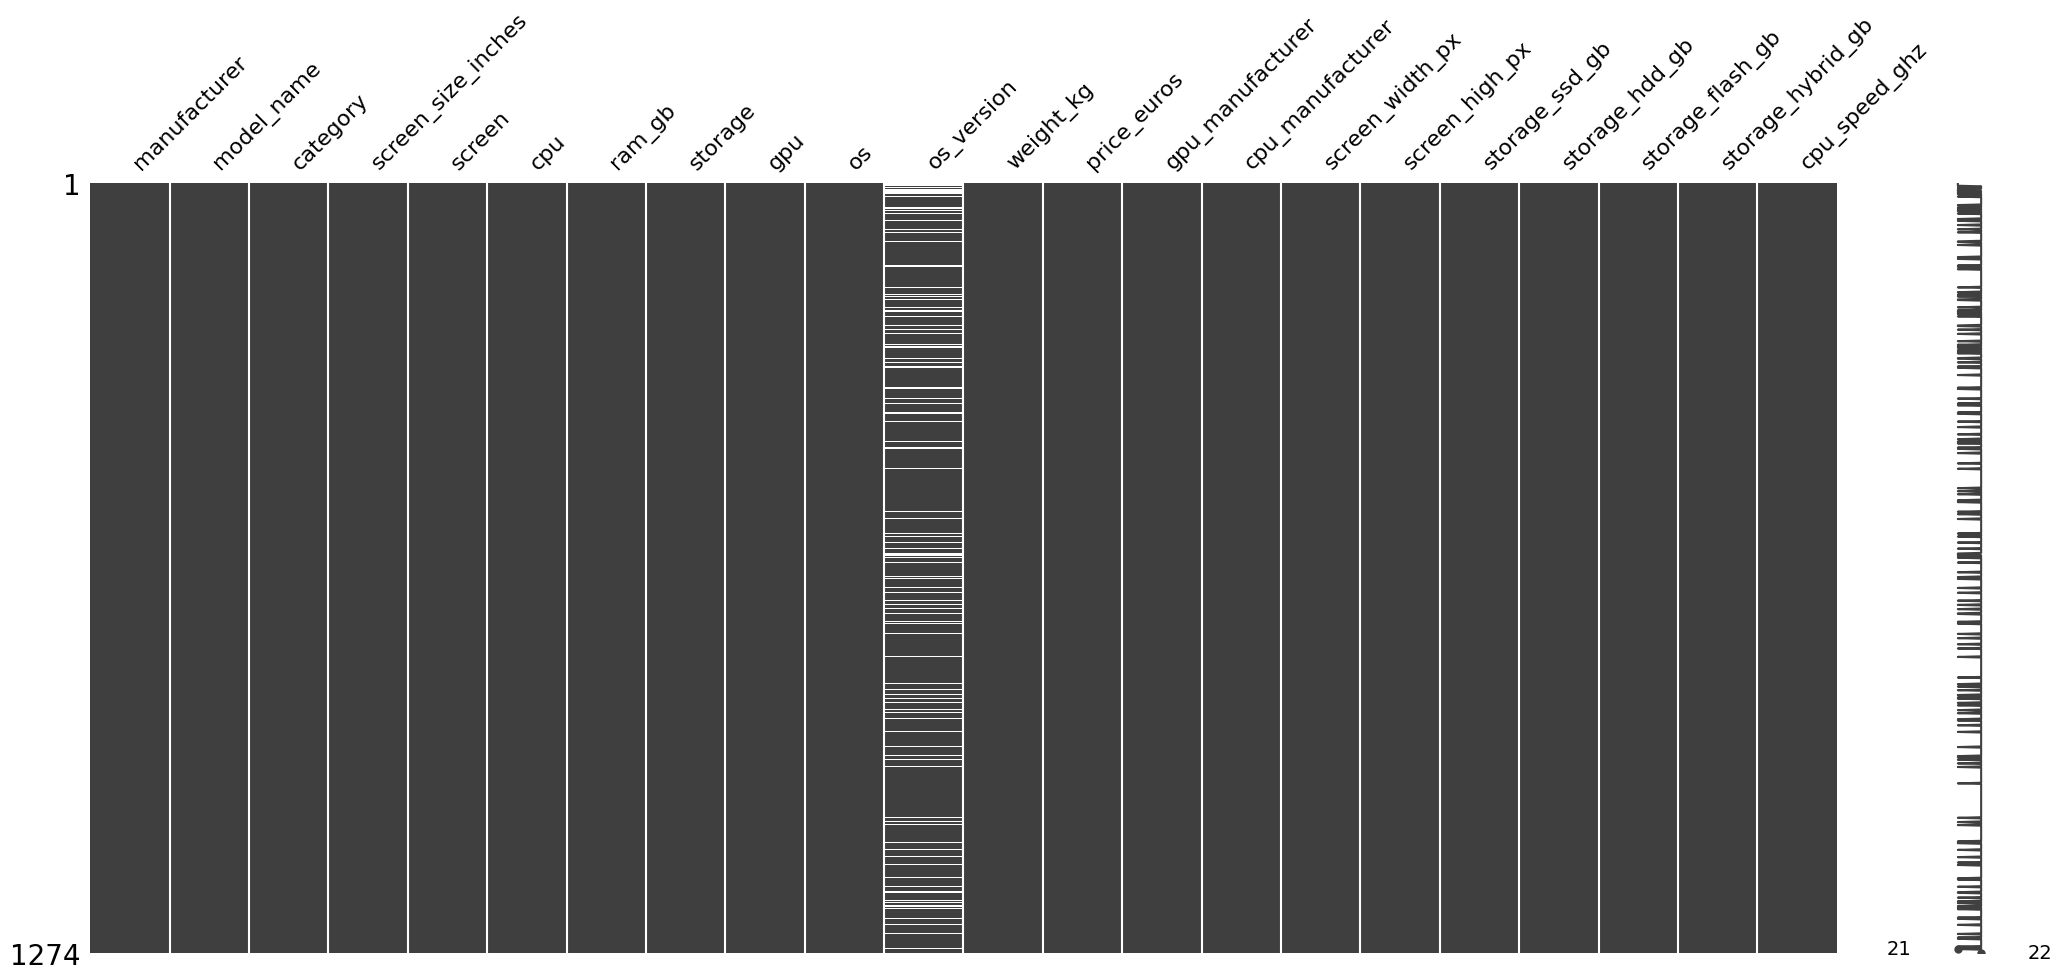

In [582]:
import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(laptops)
plt.show()

<p>While dropping rows or columns is the easiest approach to deal with missing values, it may not always be the <em>best</em> approach. For example, removing a disproportionate amount of one manufacturer's laptops could change our analysis.</p>
<p>Because of this, it's a good idea to explore the missing values in the <code>os_version</code> column before making a decision. We can use <code>Series.value_counts()</code> to explore all of the values in the column, but we'll use a parameter we haven't seen before:</p>

In [583]:
laptops["os_version"].value_counts(dropna=False)

os_version
10      1047
NaN      166
7         45
X          8
10 S       8
Name: count, dtype: int64

<p>Because we set the <code>dropna</code> parameter to <code>False</code>, the result includes null values. We can see that the majority of values in the column are <code>10</code> and missing values are the next most common.</p>

In [584]:
# Check the os for the missing values in os_version
laptops[laptops["os_version"].isna()]["os"].value_counts()

os
no_os        66
linux        58
chrome_os    27
mac_os       13
android       2
Name: count, dtype: int64

In [585]:
laptops.loc[laptops["os"] == "no_os", "os_version"] = "no_os"
laptops[laptops["os_version"].isna()]["os"].value_counts()

os
linux        58
chrome_os    27
mac_os       13
android       2
Name: count, dtype: int64

In [586]:
laptops.loc[laptops["os"] == "mac_os", ["os", "os_version"]].head()

,os,os_version
0,mac_os,NaN
1,mac_os,NaN
3,mac_os,NaN
4,mac_os,NaN
6,mac_os,X


In [587]:
# Fill the missing values in os_version for macOS
laptops.loc[laptops["os"] == "mac_os", "os_version"] = "X"
laptops[laptops["os_version"].isna()]["os"].value_counts()

os
linux        58
chrome_os    27
android       2
Name: count, dtype: int64

In [588]:
# Fill the missing values in os_version for Windows, Chrome OS, and Android
laptops.loc[laptops["os"] == "chrome_os", "os_version"] = "Version Unknown"
laptops.loc[laptops["os"] == "android", "os_version"] = "Version Unknown"
laptops.loc[laptops["os"] == "linux", "os_version"] = "Version Unknown"
laptops[laptops["os_version"].isna()]["os"].value_counts()

Series([], Name: count, dtype: int64)

In [589]:
# No more missing values
laptops.isna().sum()

manufacturer          0
model_name            0
category              0
screen_size_inches    0
screen                0
cpu                   0
ram_gb                0
storage               0
gpu                   0
os                    0
os_version            0
weight_kg             0
price_euros           0
gpu_manufacturer      0
cpu_manufacturer      0
screen_width_px       0
screen_high_px        0
storage_ssd_gb        0
storage_hdd_gb        0
storage_flash_gb      0
storage_hybrid_gb     0
cpu_speed_ghz         0
dtype: int64

Filling in missing data with the fillna method is a special case of more general value
replacement.

In [590]:
laptops["manufacturer"].value_counts()

manufacturer
Dell         291
Lenovo       289
HP           268
Asus         151
Acer         101
MSI           54
Toshiba       48
Apple         21
Samsung        9
Mediacom       7
Razer          7
Microsoft      6
Vero           4
Xiaomi         4
Chuwi          3
Fujitsu        3
Google         3
LG             3
Huawei         2
Name: count, dtype: int64

In [591]:
laptops = laptops.replace("MSI", "Micro-Star International")
laptops["manufacturer"].value_counts()

manufacturer
Dell                        291
Lenovo                      289
HP                          268
Asus                        151
Acer                        101
Micro-Star International     54
Toshiba                      48
Apple                        21
Samsung                       9
Mediacom                      7
Razer                         7
Microsoft                     6
Vero                          4
Xiaomi                        4
Chuwi                         3
Fujitsu                       3
Google                        3
LG                            3
Huawei                        2
Name: count, dtype: int64

Handling missing data is essential for ensuring dataset integrity. The choice of strategy depends on the dataset characteristics and analysis goals. Visualization techniques, deletion methods, and imputation strategies should be carefully applied based on the missing data pattern.

## Data Transformation

Data transformation is a core aspect of data wrangling, where raw data is restructured, cleaned, or enhanced to make it more useful for analysis. In pandas, this process encompasses a range of operations—from basic sorting and renaming to applying custom functions to each element of your dataset.

### Dropping Columns 

Pandas provides a handy way of removing unwanted columns or rows from a DataFrame with the `drop()` function.

`DataFrame.drop(labels=None, axis=0, index=None, columns=None, level=None, inplace=False, errors='raise')`

Drop specified labels from rows or columns.


In [592]:
laptops.columns

Index(['manufacturer', 'model_name', 'category', 'screen_size_inches',
       'screen', 'cpu', 'ram_gb', 'storage', 'gpu', 'os', 'os_version',
       'weight_kg', 'price_euros', 'gpu_manufacturer', 'cpu_manufacturer',
       'screen_width_px', 'screen_high_px', 'storage_ssd_gb', 'storage_hdd_gb',
       'storage_flash_gb', 'storage_hybrid_gb', 'cpu_speed_ghz'],
      dtype='object')

In [593]:
laptops.head(2)

,manufacturer,model_name,category,screen_size_inches,screen,cpu,ram_gb,storage,gpu,os,...,price_euros,gpu_manufacturer,cpu_manufacturer,screen_width_px,screen_high_px,storage_ssd_gb,storage_hdd_gb,storage_flash_gb,storage_hybrid_gb,cpu_speed_ghz
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,mac_os,...,1339.69,intel,intel,2560,1600,128.0,0.0,0.0,0.0,2.3
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,mac_os,...,898.94,intel,intel,1440,900,0.0,0.0,128.0,0.0,1.8


We can drop these columns in the following way:

In [594]:
to_drop = ["screen", "cpu", "storage"]
laptops = laptops.drop(columns=to_drop)
laptops.head(2)

,manufacturer,model_name,category,screen_size_inches,ram_gb,gpu,os,os_version,weight_kg,price_euros,gpu_manufacturer,cpu_manufacturer,screen_width_px,screen_high_px,storage_ssd_gb,storage_hdd_gb,storage_flash_gb,storage_hybrid_gb,cpu_speed_ghz
0,Apple,MacBook Pro,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,mac_os,X,1.37,1339.69,intel,intel,2560,1600,128.0,0.0,0.0,0.0,2.3
1,Apple,Macbook Air,Ultrabook,13.3,8,Intel HD Graphics 6000,mac_os,X,1.34,898.94,intel,intel,1440,900,0.0,0.0,128.0,0.0,1.8


### Modifying Data

Modifying data involves updating or transforming values within the DataFrame. You can update values by directly assigning to a column or using conditional logic.

In [595]:
# Update inches to cm for the screen_size_inches column
laptops["screen_size_cm"] = laptops["screen_size_inches"] * 2.54
laptops = laptops.drop(columns="screen_size_inches")
laptops.head(2)

,manufacturer,model_name,category,ram_gb,gpu,os,os_version,weight_kg,price_euros,gpu_manufacturer,cpu_manufacturer,screen_width_px,screen_high_px,storage_ssd_gb,storage_hdd_gb,storage_flash_gb,storage_hybrid_gb,cpu_speed_ghz,screen_size_cm
0,Apple,MacBook Pro,Ultrabook,8,Intel Iris Plus Graphics 640,mac_os,X,1.37,1339.69,intel,intel,2560,1600,128.0,0.0,0.0,0.0,2.3,33.782
1,Apple,Macbook Air,Ultrabook,8,Intel HD Graphics 6000,mac_os,X,1.34,898.94,intel,intel,1440,900,0.0,0.0,128.0,0.0,1.8,33.782


### Sorting Data

Sorting is essential for ordering your dataset based on one or more columns. Pandas provides multiple methods:
- **Sorting by Column Values:** Use `df.sort_values()` to sort by one or more columns.
- **Sorting by Index:** Use `df.sort_index()` to sort data based on the index.

In [596]:
# Sort without saving the result - by values
laptops.sort_values("price_euros", ascending=False).head(3)

,manufacturer,model_name,category,ram_gb,gpu,os,os_version,weight_kg,price_euros,gpu_manufacturer,cpu_manufacturer,screen_width_px,screen_high_px,storage_ssd_gb,storage_hdd_gb,storage_flash_gb,storage_hybrid_gb,cpu_speed_ghz,screen_size_cm
1157,Lenovo,ThinkPad T460s,Ultrabook,12,Intel HD Graphics 520,windows,7,1.40,229900.0,intel,intel,1920,1080,512.0,0.0,0.0,0.0,2.6,35.560
196,Razer,Blade Pro,Gaming,32,Nvidia GeForce GTX 1080,windows,10,3.49,6099.0,nvidia,intel,3840,2160,1000.0,0.0,0.0,0.0,2.9,43.942
830,Razer,Blade Pro,Gaming,32,Nvidia GeForce GTX 1080,windows,10,3.49,5499.0,nvidia,intel,3840,2160,512.0,0.0,0.0,0.0,2.9,43.942


In [597]:
# Sort without saving the result - by index
laptops.sort_index(ascending=False).head(3)

,manufacturer,model_name,category,ram_gb,gpu,os,os_version,weight_kg,price_euros,gpu_manufacturer,cpu_manufacturer,screen_width_px,screen_high_px,storage_ssd_gb,storage_hdd_gb,storage_flash_gb,storage_hybrid_gb,cpu_speed_ghz,screen_size_cm
1274,Asus,X553SA-XX031T (N3050/4GB/500GB/W10),Notebook,4,Intel HD Graphics,windows,10,2.20,369.0,intel,intel,1366,768,0.0,500.0,0.0,0.0,1.6,39.624
1273,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,6,AMD Radeon R5 M330,windows,10,2.19,764.0,amd,intel,1366,768,0.0,1000.0,0.0,0.0,2.5,39.624
1272,Lenovo,IdeaPad 100S-14IBR,Notebook,2,Intel HD Graphics,windows,10,1.50,229.0,intel,intel,1366,768,0.0,0.0,64.0,0.0,1.6,35.560


In [598]:
# Sort with saving the result - by values
laptops = laptops.sort_values("price_euros", ascending=True)
laptops.head(3)

,manufacturer,model_name,category,ram_gb,gpu,os,os_version,weight_kg,price_euros,gpu_manufacturer,cpu_manufacturer,screen_width_px,screen_high_px,storage_ssd_gb,storage_hdd_gb,storage_flash_gb,storage_hybrid_gb,cpu_speed_ghz,screen_size_cm
1215,Acer,C740-C9QX (3205U/2GB/32GB/Chrome,Netbook,2,Intel HD Graphics,chrome_os,Version Unknown,1.30,174.0,intel,intel,1366,768,32.0,0.0,0.0,0.0,1.50,29.464
20,Asus,Vivobook E200HA,Netbook,2,Intel HD Graphics 400,windows,10,0.98,191.9,intel,intel,1366,768,0.0,0.0,32.0,0.0,1.44,29.464
1120,Vero,V131 (X5-Z8350/4GB/32GB/FHD/W10),Notebook,4,Intel HD Graphics 400,windows,10,1.35,196.0,intel,intel,1920,1080,0.0,0.0,32.0,0.0,1.44,33.782


In [599]:
# Reset the index
laptops = laptops.reset_index(drop=True)
laptops.head(3)

,manufacturer,model_name,category,ram_gb,gpu,os,os_version,weight_kg,price_euros,gpu_manufacturer,cpu_manufacturer,screen_width_px,screen_high_px,storage_ssd_gb,storage_hdd_gb,storage_flash_gb,storage_hybrid_gb,cpu_speed_ghz,screen_size_cm
0,Acer,C740-C9QX (3205U/2GB/32GB/Chrome,Netbook,2,Intel HD Graphics,chrome_os,Version Unknown,1.30,174.0,intel,intel,1366,768,32.0,0.0,0.0,0.0,1.50,29.464
1,Asus,Vivobook E200HA,Netbook,2,Intel HD Graphics 400,windows,10,0.98,191.9,intel,intel,1366,768,0.0,0.0,32.0,0.0,1.44,29.464
2,Vero,V131 (X5-Z8350/4GB/32GB/FHD/W10),Notebook,4,Intel HD Graphics 400,windows,10,1.35,196.0,intel,intel,1920,1080,0.0,0.0,32.0,0.0,1.44,33.782


### Using Loops with pandas

While vectorized operations are preferred for efficiency, loops can sometimes be necessary—especially when complex logic is required that is hard to vectorize. Using loops is generally slower than vectorized operations. Whenever possible, use built-in pandas functions that operate on entire columns or DataFrames.

In [600]:
# Sample DataFrame
df = pd.DataFrame({"Name": ["Alice", "Bob", "Charlie"], "Score": [85, 90, 95]})

# Loop over rows using iterrows()
for index, row in df.iterrows():
    print(f"Row {index}: {row['Name']} scored {row['Score']}")

Row 0: Alice scored 85
Row 1: Bob scored 90
Row 2: Charlie scored 95


### Cleaning the Entire Dataset Using the map() Function

When you need to apply a transformation to every element in the DataFrame, the `map()` function is ideal. This method applies a function that accepts and returns a scalar to every element of a DataFrame.

> Note that a vectorized version of func often exists, which will be much faster.

In [601]:
# A short example of using the applymap() method

# Sample DataFrame
df = pd.DataFrame({"A": [18, 24, 73], "B": [56, 20, 30], "C": [40, 34, 30]})
print(df)


# Define a function to multiply each element by 2
def label(element, threshold):
    if element > threshold:
        return "High"
    else:
        return "Low"


# Apply the function to the DataFrame
df = df.map(label, threshold=30)
df

    A   B   C
0  18  56  40
1  24  20  34
2  73  30  30


,A,B,C
0,Low,High,High
1,Low,Low,High
2,High,Low,Low


### Custom Transformations with apply() and Lambda Functions

For more tailored transformations, you can use the apply() function along with lambda expressions.

`DataFrame.apply(func, axis=0, raw=False, result_type=None, args=(), by_row='compat', engine='python', engine_kwargs=None, **kwargs)`: Apply a function along an axis of the DataFrame. Objects passed to the function are Series objects whose index is either the DataFrame’s index (axis=0) or the DataFrame’s columns (axis=1). By default (result_type=None), the final return type is inferred from the return type of the applied function. Otherwise, it depends on the result_type argument.

In [602]:
def is_laptop_overpriced(ram_gb, weight_kg, price_euros, storage_ssd_gb, cpu_speed_ghz, threshold=0.3) -> bool:
    """Compute a value metric for a laptop and determine if it is overpriced."""
    performance = (cpu_speed_ghz * 30 + ram_gb * 30 + storage_ssd_gb * 0.5) / price_euros
    # Adjust for weight (heavier laptops are less desirable).
    value_metric = performance / weight_kg
    # Determine if the laptop is overpriced (value_metric lower than threshold)
    return value_metric < threshold

In [603]:
# Apply the function to the DataFrame
laptops["is_overpriced"] = laptops.apply(
    lambda row: is_laptop_overpriced(row["ram_gb"], row["weight_kg"], row["price_euros"], row["storage_ssd_gb"], row["cpu_speed_ghz"], threshold=0.2),
    axis="columns",
)

In [604]:
laptops.loc[:, ["ram_gb", "weight_kg", "price_euros", "storage_ssd_gb", "cpu_speed_ghz", "is_overpriced"]].sample(10)

,ram_gb,weight_kg,price_euros,storage_ssd_gb,cpu_speed_ghz,is_overpriced
1137,8,1.24,2013.1,512.0,1.3,False
157,4,2.18,443.9,0.0,2.0,True
1260,16,4.36,3154.0,512.0,2.8,True
1232,16,4.42,2699.0,256.0,2.8,True
1245,16,1.83,2858.0,512.0,2.9,True
909,16,2.40,1398.0,512.0,2.8,False
959,8,1.19,1499.0,512.0,1.8,False
1110,16,4.00,1900.0,128.0,2.6,True
513,4,2.04,839.0,256.0,2.5,True
45,4,1.86,297.0,0.0,1.8,False


## Data Type Conversion

In data analysis, datasets often originate from diverse sources, leading to inconsistencies in data types. For instance, numerical data might be read as strings, or categorical data might be represented as integers. Such discrepancies can hinder analytical operations, lead to incorrect computations, and cause inefficiencies in memory usage. Converting data to appropriate types ensures:​
- **Accuracy**: Operations yield correct results when data types align with the nature of the data.​
- **Performance**: Optimized data types enhance computational efficiency.
- **Memory Efficiency**: Appropriate types reduce the memory footprint of datasets.

---
**[PyArrow Functionality](https://pandas.pydata.org/docs/user_guide/pyarrow.html)**: pandas can utilize PyArrow to extend functionality and improve the performance of various APIs. This includes:
- More extensive data types compared to NumPy
- Missing data support (NA) for all data types
- Performant IO reader integration
- Facilitate interoperability with other dataframe libraries based on the Apache Arrow specification (e.g. polars, cuDF)


### Data Types in pandas

Pandas builds upon NumPy's data types and introduces additional types to handle missing data and categorical information effectively. For most data types, pandas uses NumPy arrays as the concrete objects contained with a Index, Series, or DataFrame.
Key data types include:​




<table class="table">
<thead>
<tr class="row-odd"><th class="head"><p>Kind of Data</p></th>
<th class="head"><p>pandas Data Type</p></th>
<th class="head"><p>Scalar</p></th>
<th class="head"><p>Array</p></th>
</tr>
</thead>
<tbody>
<tr class="row-even"><td><p>TZ-aware datetime</p></td>
<td><p><a class="reference internal" href="api/pandas.DatetimeTZDtype.html#pandas.DatetimeTZDtype" title="pandas.DatetimeTZDtype"><code class="xref py py-class docutils literal notranslate"><span class="pre">DatetimeTZDtype</span></code></a></p></td>
<td><p><a class="reference internal" href="api/pandas.Timestamp.html#pandas.Timestamp" title="pandas.Timestamp"><code class="xref py py-class docutils literal notranslate"><span class="pre">Timestamp</span></code></a></p></td>
<td><p><a class="reference internal" href="#api-arrays-datetime"><span class="std std-ref">Datetimes</span></a></p></td>
</tr>
<tr class="row-odd"><td><p>Timedeltas</p></td>
<td><p>(none)</p></td>
<td><p><a class="reference internal" href="api/pandas.Timedelta.html#pandas.Timedelta" title="pandas.Timedelta"><code class="xref py py-class docutils literal notranslate"><span class="pre">Timedelta</span></code></a></p></td>
<td><p><a class="reference internal" href="#api-arrays-timedelta"><span class="std std-ref">Timedeltas</span></a></p></td>
</tr>
<tr class="row-even"><td><p>Period (time spans)</p></td>
<td><p><a class="reference internal" href="api/pandas.PeriodDtype.html#pandas.PeriodDtype" title="pandas.PeriodDtype"><code class="xref py py-class docutils literal notranslate"><span class="pre">PeriodDtype</span></code></a></p></td>
<td><p><a class="reference internal" href="api/pandas.Period.html#pandas.Period" title="pandas.Period"><code class="xref py py-class docutils literal notranslate"><span class="pre">Period</span></code></a></p></td>
<td><p><a class="reference internal" href="#api-arrays-period"><span class="std std-ref">Periods</span></a></p></td>
</tr>
<tr class="row-odd"><td><p>Intervals</p></td>
<td><p><a class="reference internal" href="api/pandas.IntervalDtype.html#pandas.IntervalDtype" title="pandas.IntervalDtype"><code class="xref py py-class docutils literal notranslate"><span class="pre">IntervalDtype</span></code></a></p></td>
<td><p><a class="reference internal" href="api/pandas.Interval.html#pandas.Interval" title="pandas.Interval"><code class="xref py py-class docutils literal notranslate"><span class="pre">Interval</span></code></a></p></td>
<td><p><a class="reference internal" href="#api-arrays-interval"><span class="std std-ref">Intervals</span></a></p></td>
</tr>
<tr class="row-even"><td><p>Nullable Integer</p></td>
<td><p><a class="reference internal" href="api/pandas.Int64Dtype.html#pandas.Int64Dtype" title="pandas.Int64Dtype"><code class="xref py py-class docutils literal notranslate"><span class="pre">Int64Dtype</span></code></a>, …</p></td>
<td><p>(none)</p></td>
<td><p><a class="reference internal" href="#api-arrays-integer-na"><span class="std std-ref">Nullable integer</span></a></p></td>
</tr>
<tr class="row-odd"><td><p>Nullable Float</p></td>
<td><p><a class="reference internal" href="api/pandas.Float64Dtype.html#pandas.Float64Dtype" title="pandas.Float64Dtype"><code class="xref py py-class docutils literal notranslate"><span class="pre">Float64Dtype</span></code></a>, …</p></td>
<td><p>(none)</p></td>
<td><p><a class="reference internal" href="#api-arrays-float-na"><span class="std std-ref">Nullable float</span></a></p></td>
</tr>
<tr class="row-even"><td><p>Categorical</p></td>
<td><p><a class="reference internal" href="api/pandas.CategoricalDtype.html#pandas.CategoricalDtype" title="pandas.CategoricalDtype"><code class="xref py py-class docutils literal notranslate"><span class="pre">CategoricalDtype</span></code></a></p></td>
<td><p>(none)</p></td>
<td><p><a class="reference internal" href="#api-arrays-categorical"><span class="std std-ref">Categoricals</span></a></p></td>
</tr>
<tr class="row-odd"><td><p>Sparse</p></td>
<td><p><a class="reference internal" href="api/pandas.SparseDtype.html#pandas.SparseDtype" title="pandas.SparseDtype"><code class="xref py py-class docutils literal notranslate"><span class="pre">SparseDtype</span></code></a></p></td>
<td><p>(none)</p></td>
<td><p><a class="reference internal" href="#api-arrays-sparse"><span class="std std-ref">Sparse</span></a></p></td>
</tr>
<tr class="row-even"><td><p>Strings</p></td>
<td><p><a class="reference internal" href="api/pandas.StringDtype.html#pandas.StringDtype" title="pandas.StringDtype"><code class="xref py py-class docutils literal notranslate"><span class="pre">StringDtype</span></code></a></p></td>
<td><p><a class="reference external" href="https://docs.python.org/3/library/stdtypes.html#str" title="(in Python v3.12)"><code class="xref py py-class docutils literal notranslate"><span class="pre">str</span></code></a></p></td>
<td><p><a class="reference internal" href="#api-arrays-string"><span class="std std-ref">Strings</span></a></p></td>
</tr>
<tr class="row-odd"><td><p>Nullable Boolean</p></td>
<td><p><a class="reference internal" href="api/pandas.BooleanDtype.html#pandas.BooleanDtype" title="pandas.BooleanDtype"><code class="xref py py-class docutils literal notranslate"><span class="pre">BooleanDtype</span></code></a></p></td>
<td><p><a class="reference external" href="https://docs.python.org/3/library/functions.html#bool" title="(in Python v3.12)"><code class="xref py py-class docutils literal notranslate"><span class="pre">bool</span></code></a></p></td>
<td><p><a class="reference internal" href="#api-arrays-bool"><span class="std std-ref">Nullable Boolean</span></a></p></td>
</tr>
<tr class="row-even"><td><p>PyArrow</p></td>
<td><p><a class="reference internal" href="api/pandas.ArrowDtype.html#pandas.ArrowDtype" title="pandas.ArrowDtype"><code class="xref py py-class docutils literal notranslate"><span class="pre">ArrowDtype</span></code></a></p></td>
<td><p>Python Scalars or <a class="reference internal" href="api/pandas.NA.html#pandas.NA" title="pandas.NA"><code class="xref py py-class docutils literal notranslate"><span class="pre">NA</span></code></a></p></td>
<td><p><a class="reference internal" href="#api-arrays-arrow"><span class="std std-ref">PyArrow</span></a></p></td>
</tr>
</tbody>
</table>

### Measuring the memory usage of a Pandas DataFrame


While **performance** is rarely a problem with small data sets (under 100 megabytes), it can start to **become an issue with larger data sets** (100 megabytes to multiple gigabytes). Performance issues can make run times much longer, and cause code to fail entirely due to insufficient memory.

To grasp how pandas calculates this estimate, we first need to **understand how pandas represents different types of values**. Under the hood, **pandas groups the columns into blocks of values of the same type**.

The **BlockManager class** is responsible for maintaining the mapping between the row and column indexes and the actual blocks. It acts as an API that provides access to the underlying data. Whenever we select, edit, or delete values, the dataframe class interfaces with the BlockManager class to translate our requests to function and method calls.

Pandas uses the ObjectBlock class to represent the block containing string columns, and the FloatBlock class to represent the block containing float columns. For blocks representing numeric values like integers and floats, pandas combines the columns and stores them as a NumPy ndarray.

In [605]:
laptops._data

C:\Users\leon1\AppData\Local\Temp\ipykernel_21212\2897911673.py:1: DeprecationWarning: DataFrame._data is deprecated and will be removed in a future version. Use public APIs instead.
  laptops._data


BlockManager
Items: Index(['manufacturer', 'model_name', 'category', 'ram_gb', 'gpu', 'os',
       'os_version', 'weight_kg', 'price_euros', 'gpu_manufacturer',
       'cpu_manufacturer', 'screen_width_px', 'screen_high_px',
       'storage_ssd_gb', 'storage_hdd_gb', 'storage_flash_gb',
       'storage_hybrid_gb', 'cpu_speed_ghz', 'screen_size_cm',
       'is_overpriced'],
      dtype='object')
Axis 1: RangeIndex(start=0, stop=1274, step=1)
NumpyBlock: [ 7  8 13 14 15 16 17 18], 8 x 1274, dtype: float64
NumpyBlock: [ 3 11 12], 3 x 1274, dtype: int64
NumpyBlock: [ 0  1  2  4  5  6  9 10], 8 x 1274, dtype: object
NumpyBlock: slice(19, 20, 1), 1 x 1274, dtype: bool

Pandas provides an API for measuring this information, but a variety of implementation details means the results can be confusing or misleading.

Most Pandas columns are stored as NumPy arrays, and for types like integers or floats the values are stored inside the array itself. For example, if you have an array with 1,000,000 64-bit integers, each integer will always use 8 bytes of memory. The array in total will therefore use 8,000,000 bytes of RAM, plus some minor bookkeeping overhead:

In [606]:
laptops["ram_gb"].memory_usage()

10324

In [607]:
laptops["ram_gb"].memory_usage(deep=True, index=False)

10192

In [608]:
# This is the same as multiplying the memory usage by the number of rows
# 8 bytes per float64 value * rows
8 * laptops.shape[0]

10192

Different Python strings use different amounts of memory: the string "abc" will use far less memory than a string containing the complete works of William Shakespeare.

More generally, storing arbitrary Python objects requires arbitrary amounts of memory. Instead of the storing the actual strings, NumPy stores an array of pointers to those objects; each pointer takes 8 bytes on modern computers. The pointers point to an address in memory where the string is actually stored.

In [609]:
laptops["gpu"].memory_usage()

10324

In [610]:
# Force pandas to inspect the memory for each linked string value and return the true memory footprint
laptops["gpu"].memory_usage(deep=True)

88939

In [611]:
laptops.memory_usage(deep=True, index=False)

manufacturer         68925
model_name           82214
category             73636
ram_gb               10192
gpu                  88807
os                   71129
os_version           66253
weight_kg            10192
price_euros          10192
gpu_manufacturer     68842
cpu_manufacturer     68678
screen_width_px      10192
screen_high_px       10192
storage_ssd_gb       10192
storage_hdd_gb       10192
storage_flash_gb     10192
storage_hybrid_gb    10192
cpu_speed_ghz        10192
screen_size_cm       10192
is_overpriced         1274
dtype: int64

### Categorical Data

Categoricals are a pandas data type corresponding to categorical variables in statistics. A categorical variable takes on a limited, and usually fixed, number of possible values (categories; levels in R). Examples are gender, social class, blood type, country affiliation, observation time or rating via Likert scales.

Categorical variables are typically divided into two categories:​
- **Nominal Variables**: These represent categories without any intrinsic order. Examples include colors, brands, or countries.​
- **Ordinal Variables**: These have a meaningful order or ranking among categories, such as educational levels ('High School', 'Bachelor's', 'Master's') or survey responses ('Disagree', 'Neutral', 'Agree').

Utilizing the Categorical data type in pandas offers several benefits:​
- **Memory Efficiency**: Categorical data uses less memory by internally representing data with integer codes, especially beneficial when dealing with large datasets with repeated category values.​
- **Performance Improvement**: Operations like sorting and comparisons are faster on categorical data due to the underlying integer representation.​


Pandas uses a separate mapping dictionary that maps the integer values to the raw ones. This arrangement is useful whenever a column contains a limited set of values. When we convert a column to the category dtype, pandas uses the most space efficient int subtype that can represent all of the unique values in a column.

In [612]:
laptops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1274 entries, 0 to 1273
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer       1274 non-null   object 
 1   model_name         1274 non-null   object 
 2   category           1274 non-null   object 
 3   ram_gb             1274 non-null   int64  
 4   gpu                1274 non-null   object 
 5   os                 1274 non-null   object 
 6   os_version         1274 non-null   object 
 7   weight_kg          1274 non-null   float64
 8   price_euros        1274 non-null   float64
 9   gpu_manufacturer   1274 non-null   object 
 10  cpu_manufacturer   1274 non-null   object 
 11  screen_width_px    1274 non-null   int64  
 12  screen_high_px     1274 non-null   int64  
 13  storage_ssd_gb     1274 non-null   float64
 14  storage_hdd_gb     1274 non-null   float64
 15  storage_flash_gb   1274 non-null   float64
 16  storage_hybrid_gb  1274 

In [613]:
# Check number of unique values in the object columns
laptops.select_dtypes(include=["object"]).nunique()

manufacturer         19
model_name          618
category              6
gpu                 115
os                    6
os_version            6
gpu_manufacturer      4
cpu_manufacturer      3
dtype: int64

In [614]:
# Get the total size of the object columns before converting them to category
total_size = laptops.select_dtypes(include=["object"]).memory_usage(deep=True).sum()
print(f"Total memory usage of object columns: {total_size / 1024**2:.2f} MB")

Total memory usage of object columns: 0.56 MB


In [615]:
# Convert the object columns to category if the number of unique values is less than 20
for col in laptops.select_dtypes(include=["object"]):
    if laptops[col].nunique() < 20:
        laptops[col] = laptops[col].astype("category")

# Get the total size of the object columns after converting them to category
total_size = laptops.select_dtypes(include=["category", "object"]).memory_usage(deep=True).sum()
print(f"Total memory usage of category columns: {total_size / 1024**2:.2f} MB")

laptops.info(memory_usage="deep")

Total memory usage of category columns: 0.17 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1274 entries, 0 to 1273
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   manufacturer       1274 non-null   category
 1   model_name         1274 non-null   object  
 2   category           1274 non-null   category
 3   ram_gb             1274 non-null   int64   
 4   gpu                1274 non-null   object  
 5   os                 1274 non-null   category
 6   os_version         1274 non-null   category
 7   weight_kg          1274 non-null   float64 
 8   price_euros        1274 non-null   float64 
 9   gpu_manufacturer   1274 non-null   category
 10  cpu_manufacturer   1274 non-null   category
 11  screen_width_px    1274 non-null   int64   
 12  screen_high_px     1274 non-null   int64   
 13  storage_ssd_gb     1274 non-null   float64 
 14  storage_hdd_gb     1274 non-null   float64 
 15  storage

In [616]:
laptops.head(2)

,manufacturer,model_name,category,ram_gb,gpu,os,os_version,weight_kg,price_euros,gpu_manufacturer,cpu_manufacturer,screen_width_px,screen_high_px,storage_ssd_gb,storage_hdd_gb,storage_flash_gb,storage_hybrid_gb,cpu_speed_ghz,screen_size_cm,is_overpriced
0,Acer,C740-C9QX (3205U/2GB/32GB/Chrome,Netbook,2,Intel HD Graphics,chrome_os,Version Unknown,1.30,174.0,intel,intel,1366,768,32.0,0.0,0.0,0.0,1.50,29.464,False
1,Asus,Vivobook E200HA,Netbook,2,Intel HD Graphics 400,windows,10,0.98,191.9,intel,intel,1366,768,0.0,0.0,32.0,0.0,1.44,29.464,False


### Data Type Conversion

When converting data types in pandas, several principles should be considered:​
- **Implicit vs. Explicit Conversion**: 
    - Implicit Conversion: Pandas may automatically convert data types during operations (e.g., adding an integer column to a float column results in a float column).​
    - Explicit Conversion: Users manually specify the desired data type using pandas methods.​
- **Safe vs. Unsafe Conversion:**
    - Safe Conversion: Converting from a lower precision to a higher precision type (e.g., int32 to int64) without data loss.​
    - Unsafe Conversion: Converting that may lead to data loss or overflow (e.g., float64 to int32).​
- **Handling Missing Data**:
    - When converting types, it's essential to account for missing data (NaN values), especially when converting to integer types, as pandas integers do not support NaN by default.​


Pandas provides several methods to facilitate data type conversion:
- `astype()` Method: Allows explicit conversion of data types. This method can raise errors if the conversion is invalid (e.g., converting non-numeric strings to numeric types).
- `to_numeric()` Function: Converts arguments to a numeric type, with options to handle errors. Useful for converting columns with mixed data types or invalid values.
- `convert_dtypes()` Method: Introduced in pandas 1.0, this method automatically converts columns to the best possible types that support the data. This method is particularly useful for converting object types to more appropriate types like `string`, `Int64`, `Boolean`, etc.

In [617]:
laptops.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1274 entries, 0 to 1273
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   manufacturer       1274 non-null   category
 1   model_name         1274 non-null   object  
 2   category           1274 non-null   category
 3   ram_gb             1274 non-null   int64   
 4   gpu                1274 non-null   object  
 5   os                 1274 non-null   category
 6   os_version         1274 non-null   category
 7   weight_kg          1274 non-null   float64 
 8   price_euros        1274 non-null   float64 
 9   gpu_manufacturer   1274 non-null   category
 10  cpu_manufacturer   1274 non-null   category
 11  screen_width_px    1274 non-null   int64   
 12  screen_high_px     1274 non-null   int64   
 13  storage_ssd_gb     1274 non-null   float64 
 14  storage_hdd_gb     1274 non-null   float64 
 15  storage_flash_gb   1274 non-null   float64 
 16  storag

In [618]:
# Check the min, max and unique values in the ram_gb column
print(f"Min: {laptops['ram_gb'].min()}")
print(f"Max: {laptops['ram_gb'].max()}")
print(f"Unique values: {laptops['ram_gb'].unique()}")

Min: 2
Max: 64
Unique values: [ 2  4  8  6 12 16 24 32 64]


In [619]:
# Convert the ram_gb column to the smallest unsigned integer type that can fit all the values
laptops["ram_gb"] = pd.to_numeric(laptops["ram_gb"], downcast="unsigned")
laptops.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1274 entries, 0 to 1273
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   manufacturer       1274 non-null   category
 1   model_name         1274 non-null   object  
 2   category           1274 non-null   category
 3   ram_gb             1274 non-null   uint8   
 4   gpu                1274 non-null   object  
 5   os                 1274 non-null   category
 6   os_version         1274 non-null   category
 7   weight_kg          1274 non-null   float64 
 8   price_euros        1274 non-null   float64 
 9   gpu_manufacturer   1274 non-null   category
 10  cpu_manufacturer   1274 non-null   category
 11  screen_width_px    1274 non-null   int64   
 12  screen_high_px     1274 non-null   int64   
 13  storage_ssd_gb     1274 non-null   float64 
 14  storage_hdd_gb     1274 non-null   float64 
 15  storage_flash_gb   1274 non-null   float64 
 16  storag

In [620]:
# Convert all the numeric columns to the smallest type that can fit all the values
for col in laptops.select_dtypes(include=["int"]):
    laptops[col] = pd.to_numeric(laptops[col], downcast="unsigned")

for col in laptops.select_dtypes(include=["float"]):
    laptops[col] = pd.to_numeric(laptops[col], downcast="float")

laptops.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1274 entries, 0 to 1273
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   manufacturer       1274 non-null   category
 1   model_name         1274 non-null   object  
 2   category           1274 non-null   category
 3   ram_gb             1274 non-null   uint8   
 4   gpu                1274 non-null   object  
 5   os                 1274 non-null   category
 6   os_version         1274 non-null   category
 7   weight_kg          1274 non-null   float32 
 8   price_euros        1274 non-null   float32 
 9   gpu_manufacturer   1274 non-null   category
 10  cpu_manufacturer   1274 non-null   category
 11  screen_width_px    1274 non-null   uint16  
 12  screen_high_px     1274 non-null   uint16  
 13  storage_ssd_gb     1274 non-null   float32 
 14  storage_hdd_gb     1274 non-null   float32 
 15  storage_flash_gb   1274 non-null   float32 
 16  storag

In [621]:
# Convert model_name to a string type
laptops["model_name"] = laptops["model_name"].astype("string")
laptops.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1274 entries, 0 to 1273
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   manufacturer       1274 non-null   category
 1   model_name         1274 non-null   string  
 2   category           1274 non-null   category
 3   ram_gb             1274 non-null   uint8   
 4   gpu                1274 non-null   object  
 5   os                 1274 non-null   category
 6   os_version         1274 non-null   category
 7   weight_kg          1274 non-null   float32 
 8   price_euros        1274 non-null   float32 
 9   gpu_manufacturer   1274 non-null   category
 10  cpu_manufacturer   1274 non-null   category
 11  screen_width_px    1274 non-null   uint16  
 12  screen_high_px     1274 non-null   uint16  
 13  storage_ssd_gb     1274 non-null   float32 
 14  storage_hdd_gb     1274 non-null   float32 
 15  storage_flash_gb   1274 non-null   float32 
 16  storag

In [622]:
# Use the convert_dtypes() method to convert the DataFrame to the best possible dtypes
laptops = laptops.convert_dtypes()
laptops.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1274 entries, 0 to 1273
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   manufacturer       1274 non-null   category
 1   model_name         1274 non-null   string  
 2   category           1274 non-null   category
 3   ram_gb             1274 non-null   UInt8   
 4   gpu                1274 non-null   string  
 5   os                 1274 non-null   category
 6   os_version         1274 non-null   category
 7   weight_kg          1274 non-null   Float32 
 8   price_euros        1274 non-null   Float32 
 9   gpu_manufacturer   1274 non-null   category
 10  cpu_manufacturer   1274 non-null   category
 11  screen_width_px    1274 non-null   UInt16  
 12  screen_high_px     1274 non-null   UInt16  
 13  storage_ssd_gb     1274 non-null   Int64   
 14  storage_hdd_gb     1274 non-null   Int64   
 15  storage_flash_gb   1274 non-null   Int64   
 16  storag

In [623]:
laptops.head(2)

,manufacturer,model_name,category,ram_gb,gpu,os,os_version,weight_kg,price_euros,gpu_manufacturer,cpu_manufacturer,screen_width_px,screen_high_px,storage_ssd_gb,storage_hdd_gb,storage_flash_gb,storage_hybrid_gb,cpu_speed_ghz,screen_size_cm,is_overpriced
0,Acer,C740-C9QX (3205U/2GB/32GB/Chrome,Netbook,2,Intel HD Graphics,chrome_os,Version Unknown,1.3,174.0,intel,intel,1366,768,32,0,0,0,1.5,29.464001,False
1,Asus,Vivobook E200HA,Netbook,2,Intel HD Graphics 400,windows,10,0.98,191.899994,intel,intel,1366,768,0,0,32,0,1.44,29.464001,False


## Merging Data

Data in the real world is rarely stored in a single, neatly formatted table. Instead, it is often distributed across multiple sources, requiring you to combine and reshape it into a comprehensive DataFrame before analysis. Pandas offers several methods to merge and join datasets, including `merge()`, `join()`, and `concat()`. Each method serves different needs and has its own advantages and trade-offs.


There are two main categories of combining datasets in pandas:
- **Concatenating Data:** Combining DataFrames along a particular axis (rows or columns) using functions like `pd.concat()`.
- **Database-Style Merging/Joining:** Combining DataFrames based on key columns (similar to SQL joins) using methods like `pd.merge()` or the DataFrame's `.join()` method.

<table data-start="4844" data-end="5739" node="[object Object]"><thead data-start="4844" data-end="5016"><tr data-start="4844" data-end="5016"><th data-start="4844" data-end="4861">Method</th><th data-start="4861" data-end="4897">Use Case</th><th data-start="4897" data-end="4958">Pros</th><th data-start="4958" data-end="5016">Cons</th></tr></thead><tbody data-start="5190" data-end="5739"><tr data-start="5190" data-end="5368"><td><code data-start="5192" data-end="5205">pd.concat()</code></td><td>Stacking DataFrames (rows/columns)</td><td>Simple syntax, flexible axis control, handles different indices</td><td>Lacks key-based joining; may need index management</td></tr><tr data-start="5369" data-end="5567"><td><code data-start="5371" data-end="5383">pd.merge()</code></td><td>Database-style joins on columns</td><td>Powerful join types (inner, outer, left, right), multiple key support</td><td>Can be complex with many keys; potentially slower with large datasets</td></tr><tr data-start="5568" data-end="5739"><td><code data-start="5570" data-end="5579">.join()</code></td><td>Joining on index</td><td>Convenient for index-based joins, simple syntax, fast</td><td>Limited to index joins, less flexible than <code data-start="5726" data-end="5735">merge()</code></td></tr></tbody></table>

<table class="tg">
<tbody><tr>
<th></th>
<th><span style="font-weight:bold">pd.concat()</span></th>
<th><span style="font-weight:bold">pd.merge()</span></th>
</tr>
<tr>
<td><span style="font-style:normal">Default Join Type</span></td>
<td><span style="font-weight:300;font-style:normal">Outer</span></td>
<td><span style="font-weight:300;font-style:normal">Inner</span></td>
</tr>
<tr>
<td><span style="font-style:normal">Can Combine More Than Two Dataframes at a Time?</span></td>
<td><span style="font-weight:300;font-style:normal">Yes</span></td>
<td><span style="font-weight:300;font-style:normal">No</span></td>
</tr>
<tr>
<td><span style="font-style:normal">Can Combine Dataframes Vertically</span><br><span style="font-style:normal">(axis=0) or Horizontally (axis=1)?</span><br></td>
<td><span style="font-weight:300;font-style:normal">Both</span></td>
<td><span style="font-weight:300;font-style:normal">Horizontally</span></td>
</tr>
<tr>
<td>Syntax</td>
<td><span style="font-weight:bold">Concat (Vertically)</span><br>concat([df1,df2,df3])<br><br><span style="font-weight:bold">Concat (Horizontally)</span><br>concat([df1,df2,df3], axis = 1)<br><br><br><br></td>
<td><span style="font-weight:bold">Merge (Join on Columns)</span><br>merge(left = df1, right = df2, how = 'join_type', on = 'Col')<br><br><span style="font-weight:bold">Merge (Join on Index)</span><br>merge(left = df1, right = df2, how = 'join_type', left_index = True, right_index = True)<br><br><br><br></td>
</tr>
</tbody></table>


### Concatenating DataFrames with pd.concat()

The pd.concat() function is used to stack DataFrames either vertically (adding more rows) or horizontally (adding more columns).

In [624]:
# Create two sample DataFrames with the same columns
df1 = pd.DataFrame({'ID': [1, 2, 3], 'Name': ['Alice', 'Bob', 'Charlie'], "Age": [25, 30, 35]})
df2 = pd.DataFrame({'ID': [4, 5], 'Name': ['David', 'Eva']})

In [625]:
df1

,ID,Name,Age
0,1,Alice,25
1,2,Bob,30
2,3,Charlie,35


In [626]:
df2

,ID,Name
0,4,David
1,5,Eva


In [627]:
# Concatenate DataFrames vertically
pd.concat([df1, df2], axis="index")

,ID,Name,Age
0,1,Alice,25.0
1,2,Bob,30.0
2,3,Charlie,35.0
0,4,David,NaN
1,5,Eva,NaN


In [628]:
# Concatenate DataFrames horizontally
pd.concat([df1, df2], axis="columns")

,ID,Name,Age,ID,Name
0,1,Alice,25,4.0,David
1,2,Bob,30,5.0,Eva
2,3,Charlie,35,NaN,NaN


 When you use the concat() function to combine dataframes with the same shape and index, you can think of the function as "gluing" dataframes together. By default, the concat function will keep ALL of the data, no matter if missing values are created.

 Also, notice again the indexes of the original dataframes didn't change. If the indexes aren't meaningful, it can be better to reset them. This is especially true when we create duplicate indexes, because they could cause errors as we perform other data cleaning tasks.

In [629]:
pd.concat([df1, df2], axis="index", ignore_index=True)

,ID,Name,Age
0,1,Alice,25.0
1,2,Bob,30.0
2,3,Charlie,35.0
3,4,David,NaN
4,5,Eva,NaN


### Merging DataFrames with pd.merge()

The `pd.merge()` function allows you to perform database-style joins (inner, outer, left, right) using one or more key columns.

<p>There are actually four different types of joins:</p>
    <ol>
<li><strong>Inner</strong>: only includes elements that appear in both dataframes with a common key</li>
<li><strong>Outer</strong>: includes all data from both dataframes</li>
<li><strong>Left</strong>: includes all of the rows from the "left" dataframe along with any rows from the "right" dataframe with a common key; the result retains all columns from both of the original dataframes</li>
<li><strong>Right</strong>: includes all of the rows from the "right" dataframe along with any rows from the "left" dataframe with a common key; the result retains all columns from both of the original dataframes</li>
</ol>

In [630]:
salary_2022 = pd.DataFrame({
    'ID': [1, 2, 3, 4],
    'Name': ['Alice', 'Bob', 'Charlie', 'David'],
    'Salary': [50000, 60000, 70000, 80000]
})
salary_2023 = pd.DataFrame({
    'ID': [1, 4, 5, 6],
    "Name_Person": ["Alice", "David", "Eva", "Frank"],
    'Salary': [70000, 85000, 90000, 100000]
})

In [631]:
salary_2022

,ID,Name,Salary
0,1,Alice,50000
1,2,Bob,60000
2,3,Charlie,70000
3,4,David,80000


In [632]:
salary_2023

,ID,Name_Person,Salary
0,1,Alice,70000
1,4,David,85000
2,5,Eva,90000
3,6,Frank,100000


In [633]:
pd.merge(left=salary_2022, right=salary_2023, on="ID", how="inner")

,ID,Name,Salary_x,Name_Person,Salary_y
0,1,Alice,50000,Alice,70000
1,4,David,80000,David,85000


In [634]:
pd.merge(left=salary_2022, right=salary_2023, on="ID", how="inner", suffixes=("_2022", "_2023"))

,ID,Name,Salary_2022,Name_Person,Salary_2023
0,1,Alice,50000,Alice,70000
1,4,David,80000,David,85000


In [635]:
pd.merge(left=salary_2022, 
         right=salary_2023, 
         left_on="Name", 
         right_on="Name_Person", 
         how="inner", 
         suffixes=("_2022", "_2023"),
         )

,ID_2022,Name,Salary_2022,ID_2023,Name_Person,Salary_2023
0,1,Alice,50000,1,Alice,70000
1,4,David,80000,4,David,85000


In [636]:
pd.merge(left=salary_2022, 
         right=salary_2023, 
         on="ID",
         how="outer", 
         suffixes=("_2022", "_2023"),
         )

,ID,Name,Salary_2022,Name_Person,Salary_2023
0,1,Alice,50000.0,Alice,70000.0
1,2,Bob,60000.0,NaN,NaN
2,3,Charlie,70000.0,NaN,NaN
3,4,David,80000.0,David,85000.0
4,5,NaN,NaN,Eva,90000.0
5,6,NaN,NaN,Frank,100000.0


In [637]:
pd.merge(left=salary_2022, 
         right=salary_2023, 
         on="ID",
         how="left", 
         suffixes=("_2022", "_2023"),
         )

,ID,Name,Salary_2022,Name_Person,Salary_2023
0,1,Alice,50000,Alice,70000.0
1,2,Bob,60000,NaN,NaN
2,3,Charlie,70000,NaN,NaN
3,4,David,80000,David,85000.0


In [638]:
pd.merge(left=salary_2022, 
         right=salary_2023, 
         on="ID",
         how="right", 
         suffixes=("_2022", "_2023"),
         )

,ID,Name,Salary_2022,Name_Person,Salary_2023
0,1,Alice,50000.0,Alice,70000
1,4,David,80000.0,David,85000
2,5,NaN,NaN,Eva,90000
3,6,NaN,NaN,Frank,100000


Join on index:

In [639]:
# We can see the miss match between the two DataFrames
pd.merge(left=salary_2022, 
        right=salary_2023, 
        left_index=True,
        right_index=True,
        how="outer",
        suffixes=("_2022", "_2023"),
)

,ID_2022,Name,Salary_2022,ID_2023,Name_Person,Salary_2023
0,1,Alice,50000,1,Alice,70000
1,2,Bob,60000,4,David,85000
2,3,Charlie,70000,5,Eva,90000
3,4,David,80000,6,Frank,100000


In [640]:
# Set index for the DataFrames
salary_2022_indexed = salary_2022.set_index("ID")
salary_2023_indexed = salary_2023.set_index("ID")
pd.merge(left=salary_2022_indexed, 
        right=salary_2023_indexed, 
        left_index=True,
        right_index=True,
        how="outer",
        suffixes=("_2022", "_2023"),
)

,Name,Salary_2022,Name_Person,Salary_2023
ID,,,,
1,Alice,50000.0,Alice,70000.0
2,Bob,60000.0,NaN,NaN
3,Charlie,70000.0,NaN,NaN
4,David,80000.0,David,85000.0
5,NaN,NaN,Eva,90000.0
6,NaN,NaN,Frank,100000.0


The DataFrame’s .`join()` method is a convenient way to combine DataFrames based on the index. It can be thought of as a simplified merge operation when the join key is the index.

In [641]:
salary_2022_indexed.join(salary_2023_indexed, lsuffix="_2022", rsuffix="_2023", how="outer")

,Name,Salary_2022,Name_Person,Salary_2023
ID,,,,
1,Alice,50000.0,Alice,70000.0
2,Bob,60000.0,NaN,NaN
3,Charlie,70000.0,NaN,NaN
4,David,80000.0,David,85000.0
5,NaN,NaN,Eva,90000.0
6,NaN,NaN,Frank,100000.0


## Handling Outliers

**What are Outliers?**

Outliers are data points that deviate significantly from the majority of the data. They may arise due to errors in data collection, data entry mistakes, or genuine variability in the dataset.

**Why is it Important?**
- Impact on Analysis: Outliers can skew summary statistics (e.g., mean, standard deviation) and lead to misleading conclusions in regression analysis, clustering, and other models.
- Model Performance: In predictive modeling, outliers might affect the training process, causing models to overfit or underperform.
- Data Quality: Handling outliers is part of cleaning your data to ensure that subsequent analysis and decisions are based on reliable information.

In [642]:
# Check the value distribution in the manufacturer column
laptops.describe()

,ram_gb,weight_kg,price_euros,screen_width_px,screen_high_px,storage_ssd_gb,storage_hdd_gb,storage_flash_gb,storage_hybrid_gb,cpu_speed_ghz,screen_size_cm
count,1274.0,1274.0,1274.0,1274.0,1274.0,1274.0,1274.0,1274.0,1274.0,1274.0,1274.0
mean,8.44427,2.040557,1314.169189,1900.463108,1074.144427,184.399529,412.213501,4.508634,7.463108,2.302904,38.157024
std,5.098291,0.669458,6447.338379,493.312718,283.865869,184.704162,516.072672,30.500079,84.952298,0.504036,3.632046
min,2.0,0.69,174.0,1366.0,768.0,0.0,0.0,0.0,0.0,0.9,25.653999
25%,4.0,1.5,609.902496,1920.0,1080.0,0.0,0.0,0.0,0.0,2.0,35.560001
50%,8.0,2.04,989.0,1920.0,1080.0,256.0,0.0,0.0,0.0,2.5,39.624001
75%,8.0,2.31,1497.25,1920.0,1080.0,256.0,1000.0,0.0,0.0,2.7,39.624001
max,64.0,4.7,229900.0,3840.0,2160.0,1000.0,2000.0,512.0,1000.0,3.6,46.736


Outlier detection is critical for ensuring that your analysis is not skewed by extreme values. There are two primary approaches: statistical methods that compute numerical thresholds, and visualization methods that help you visually inspect the distribution of your data.

### Z-Score Method

The Z-score method computes how many standard deviations each data point is from the mean. A common threshold is a z-score of 3 (or -3), meaning data points with z-scores greater than 3 or less than -3 are considered outliers.

In [643]:
from scipy.stats import zscore

(laptops.select_dtypes(include=["int", "float"]).apply(zscore).abs() > 3).sum()

weight_kg            33
price_euros           1
storage_ssd_gb       16
storage_hdd_gb       31
storage_flash_gb     14
storage_hybrid_gb    10
cpu_speed_ghz         0
screen_size_cm        4
dtype: int64

### Interquartile Range (IQR) Method

The IQR method uses the 25th percentile (Q1) and 75th percentile (Q3) to define the interquartile range (IQR = Q3 - Q1). Outliers are typically defined as values outside the range <span class="katex"><span class="katex-mathml"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><mo stretchy="false">[</mo><mi>Q</mi><mn>1</mn><mo>−</mo><mn>1.5</mn><mo>×</mo><mi>I</mi><mi>Q</mi><mi>R</mi><mo separator="true">,</mo><mi>Q</mi><mn>3</mn><mo>+</mo><mn>1.5</mn><mo>×</mo><mi>I</mi><mi>Q</mi><mi>R</mi><mo stretchy="false">]</mo></mrow><annotation encoding="application/x-tex">[Q1 - 1.5 \times IQR, Q3 + 1.5 \times IQR]</annotation></semantics></math></span><span class="katex-html" aria-hidden="true"><span class="base"><span class="strut" style="height: 1em; vertical-align: -0.25em;"></span><span class="mopen">[</span><span class="mord mathnormal">Q</span><span class="mord">1</span><span class="mspace" style="margin-right: 0.2222em;"></span><span class="mbin">−</span><span class="mspace" style="margin-right: 0.2222em;"></span></span><span class="base"><span class="strut" style="height: 0.7278em; vertical-align: -0.0833em;"></span><span class="mord">1.5</span><span class="mspace" style="margin-right: 0.2222em;"></span><span class="mbin">×</span><span class="mspace" style="margin-right: 0.2222em;"></span></span><span class="base"><span class="strut" style="height: 0.8778em; vertical-align: -0.1944em;"></span><span class="mord mathnormal" style="margin-right: 0.07847em;">I</span><span class="mord mathnormal" style="margin-right: 0.00773em;">QR</span><span class="mpunct">,</span><span class="mspace" style="margin-right: 0.1667em;"></span><span class="mord mathnormal">Q</span><span class="mord">3</span><span class="mspace" style="margin-right: 0.2222em;"></span><span class="mbin">+</span><span class="mspace" style="margin-right: 0.2222em;"></span></span><span class="base"><span class="strut" style="height: 0.7278em; vertical-align: -0.0833em;"></span><span class="mord">1.5</span><span class="mspace" style="margin-right: 0.2222em;"></span><span class="mbin">×</span><span class="mspace" style="margin-right: 0.2222em;"></span></span><span class="base"><span class="strut" style="height: 1em; vertical-align: -0.25em;"></span><span class="mord mathnormal" style="margin-right: 0.07847em;">I</span><span class="mord mathnormal" style="margin-right: 0.00773em;">QR</span><span class="mclose">]</span></span></span></span>.</p>

In [644]:
# Calculate Q1, Q3, and IQR for the price_euros column
Q1 = laptops["price_euros"].quantile(0.25)
Q3 = laptops["price_euros"].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Flag outliers based on IQR method
df = laptops.copy()
df['outlier_iqr'] = (laptops['price_euros'] < lower_bound) | (laptops['price_euros'] > upper_bound)

df.loc[df['outlier_iqr'] == True,  ['price_euros', 'outlier_iqr']].tail(5)

,price_euros,outlier_iqr
1269,4389.0,True
1270,4899.0,True
1271,5499.0,True
1272,6099.0,True
1273,229900.0,True


### Visualization Methods - Boxplots

Boxplots provide a visual summary of the distribution of data, highlighting the median, quartiles, and potential outliers as points outside the whiskers (typically defined as 1.5 times the IQR from the quartiles). Outliers appear as individual points beyond the whiskers, allowing you to quickly assess the spread and extreme values.

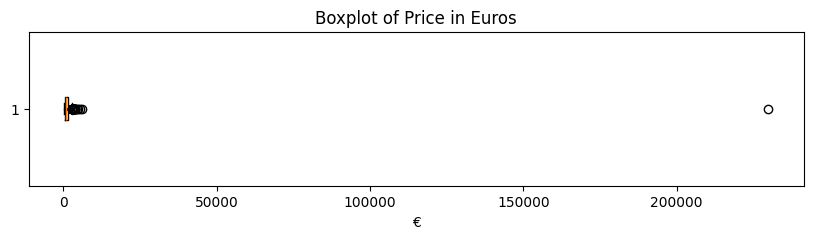

In [645]:
import matplotlib.pyplot as plt

# Create a boxplot for the 'Value' column
plt.figure(figsize=(10, 2))
plt.boxplot(laptops['price_euros'], vert=False)
plt.title("Boxplot of Price in Euros")
plt.xlabel("€")
plt.show()

In [646]:
# We see an extreme outlier
laptops[laptops["price_euros"] > 50000]

,manufacturer,model_name,category,ram_gb,gpu,os,os_version,weight_kg,price_euros,gpu_manufacturer,cpu_manufacturer,screen_width_px,screen_high_px,storage_ssd_gb,storage_hdd_gb,storage_flash_gb,storage_hybrid_gb,cpu_speed_ghz,screen_size_cm,is_overpriced
1273,Lenovo,ThinkPad T460s,Ultrabook,12,Intel HD Graphics 520,windows,7,1.4,229900.0,intel,intel,1920,1080,512,0,0,0,2.6,35.560001,True


In [647]:
# Let's fix the outlier by dividing the price by 100
laptops.loc[laptops["price_euros"] > 50000, "price_euros"] = laptops["price_euros"] / 100

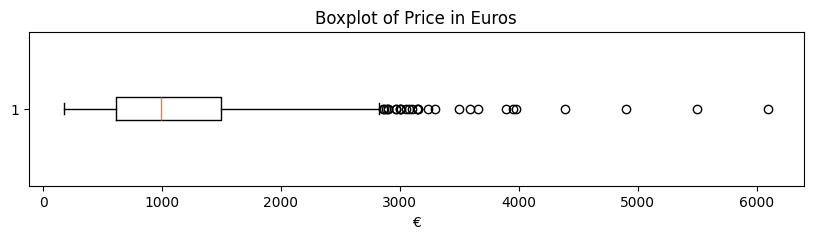

In [648]:
plt.figure(figsize=(10, 2))
plt.boxplot(laptops['price_euros'], vert=False)
plt.title("Boxplot of Price in Euros")
plt.xlabel("€")
plt.show()

### Visualization Methods - Scatter Plots

Scatter plots can be used to visualize outliers in the context of another variable. By plotting data points along two axes, you can often visually identify points that deviate significantly from the pattern. This visualization helps in assessing outliers in the context of the overall data pattern.

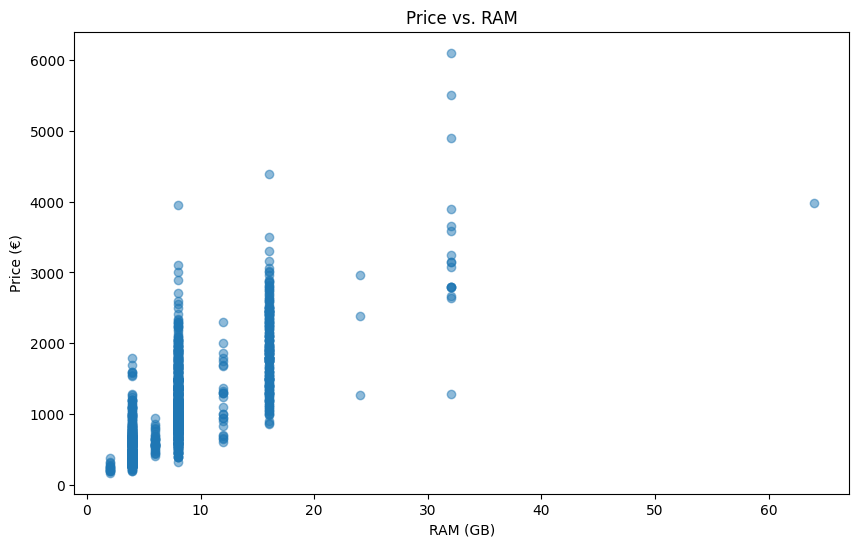

In [649]:
# Plot a scatter plot of the price and ram_gb columns
plt.figure(figsize=(10, 6))
plt.scatter(laptops['ram_gb'], laptops['price_euros'], alpha=0.5)
plt.title("Price vs. RAM")
plt.xlabel("RAM (GB)")
plt.ylabel("Price (€)")
plt.show()

Each method has its strengths: statistical methods provide clear numerical thresholds, while visualization methods offer an intuitive view of the data. Combining these techniques can yield a robust approach to outlier detection in your data analysis workflow.

## Ensuring Data Quality and Integrity

Data quality and integrity are critical for reliable analyses and sound decision-making. In this subchapter, we explore various techniques and best practices for validating your data and handling inaccuracies.

### Using Assertions in pandas

A simple yet effective way to enforce data quality is by using Python's built-in assert statement. This allows you to set conditions that must be met before proceeding with further analysis. For instance, if you expect no missing values in a column, you can assert that condition:

In [650]:
laptops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1274 entries, 0 to 1273
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   manufacturer       1274 non-null   category
 1   model_name         1274 non-null   string  
 2   category           1274 non-null   category
 3   ram_gb             1274 non-null   UInt8   
 4   gpu                1274 non-null   string  
 5   os                 1274 non-null   category
 6   os_version         1274 non-null   category
 7   weight_kg          1274 non-null   Float32 
 8   price_euros        1274 non-null   Float32 
 9   gpu_manufacturer   1274 non-null   category
 10  cpu_manufacturer   1274 non-null   category
 11  screen_width_px    1274 non-null   UInt16  
 12  screen_high_px     1274 non-null   UInt16  
 13  storage_ssd_gb     1274 non-null   Int64   
 14  storage_hdd_gb     1274 non-null   Int64   
 15  storage_flash_gb   1274 non-null   Int64   
 16  storag

> `DataFrame.all(axis=0, bool_only=False, skipna=True, **kwargs)`: Return whether all elements are True, potentially over an axis. Returns True unless there at least one element within a series or along a Dataframe axis that is False or equivalent (e.g. zero or empty).

In [651]:
# Assert RAM is a positive integer and not bigger than 256 GB
assert (laptops["ram_gb"] > 0).all()
assert (laptops["ram_gb"] <= 256).all()

In [652]:
# Assert manufacturer and model_name have no missing values
assert laptops["manufacturer"].notnull().all()
assert laptops["model_name"].notnull().all()

In [ ]:
# Check there are no additional data in () in the model_name column
# The assertion will fail
#assert laptops["model_name"].str.contains(r".*\(.*\)?.*").sum() == 0, "There are additional data in the model_name column"

AssertionError: There are additional data in the model_name column

In [656]:
# Remove the additional data in () in the model_name column
laptops["model_name"] = laptops["model_name"].str.replace(r"\(.*\)?", "", regex=True).str.strip()

In [657]:
laptops["model_name"].unique()

<StringArray>
[           'C740-C9QX',      'Vivobook E200HA',                 'V131',
 'Chromebook C910-C2ST',        'E402WA-GA010T',                 'K146',
     'Stream 11-Y000na',        'Chromebook 15',                 'V142',
         'A541NA-GO342',
 ...
         'ThinkPad P70',   'Rog G701VIK-BA060T',         'Thinkpad P71',
       'Precision 7520',      'Elitebook Folio',        'Thinkpad P51s',
    'ROG G703VI-E5062T',           'ROG G701VO',             'Zbook 17',
       'ThinkPad T460s']
Length: 593, dtype: string

In [658]:
assert laptops["model_name"].str.contains(r".*\(.*\)?.*").sum() == 0, "There are additional data in the model_name column"

### Data Validation with Pandera


[Pandera](https://pandera.readthedocs.io/en/stable/) is a powerful library designed for data validation in pandas. It allows you to define schemas for your DataFrames, specifying data types, ranges, and custom validation logic.

In [662]:
import pandera as pa
from pandera import Column, DataFrameSchema, Check, errors

schema = DataFrameSchema({
    "price_euros": Column(
        pa.Float32, 
        checks=Check(lambda x: x >= 0 and x <= 10_000, element_wise=True),
        nullable=False
    ),
    "ram_gb": Column(
        pa.UINT8, 
        checks=Check(lambda x: x >= 0 and x <= 256, element_wise=True),
        nullable=False
    ),
})

try:
    schema.validate(laptops)
except errors.SchemaError as e:
    print("Data validation error:", e)

Ensuring data quality and integrity is foundational to trustworthy data analysis. Through assertions, Pandera, and common validation techniques like range and uniqueness checks, you can detect and correct data issues before they impact your analyses.

Now we can export the data to a Parquet file:

In [663]:
laptops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1274 entries, 0 to 1273
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   manufacturer       1274 non-null   category
 1   model_name         1274 non-null   string  
 2   category           1274 non-null   category
 3   ram_gb             1274 non-null   UInt8   
 4   gpu                1274 non-null   string  
 5   os                 1274 non-null   category
 6   os_version         1274 non-null   category
 7   weight_kg          1274 non-null   Float32 
 8   price_euros        1274 non-null   Float32 
 9   gpu_manufacturer   1274 non-null   category
 10  cpu_manufacturer   1274 non-null   category
 11  screen_width_px    1274 non-null   UInt16  
 12  screen_high_px     1274 non-null   UInt16  
 13  storage_ssd_gb     1274 non-null   Int64   
 14  storage_hdd_gb     1274 non-null   Int64   
 15  storage_flash_gb   1274 non-null   Int64   
 16  storag

In [664]:
# Export the cleaned dataset to a new Parquet file
dataset_path_clean_laptops = Path.cwd().parent / "data" / "OUTPUT_laptops.parquet"
laptops.to_parquet(dataset_path_clean_laptops, index=False)

In [665]:
# Load the cleaned dataset from the Parquet file and check the types
laptops_clean = pd.read_parquet(dataset_path_clean_laptops)
laptops_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1274 entries, 0 to 1273
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   manufacturer       1274 non-null   category
 1   model_name         1274 non-null   string  
 2   category           1274 non-null   category
 3   ram_gb             1274 non-null   UInt8   
 4   gpu                1274 non-null   string  
 5   os                 1274 non-null   category
 6   os_version         1274 non-null   category
 7   weight_kg          1274 non-null   Float32 
 8   price_euros        1274 non-null   Float32 
 9   gpu_manufacturer   1274 non-null   category
 10  cpu_manufacturer   1274 non-null   category
 11  screen_width_px    1274 non-null   UInt16  
 12  screen_high_px     1274 non-null   UInt16  
 13  storage_ssd_gb     1274 non-null   Int64   
 14  storage_hdd_gb     1274 non-null   Int64   
 15  storage_flash_gb   1274 non-null   Int64   
 16  storag

## End-to-End Data Wrangling Pipeline

- **Example 1: Sales Transactions Data Pipeline**: You are provided with sales transaction datasets from multiple regional stores. Each dataset contains information such as transaction IDs, product details, quantities sold, sales amounts, and dates. However, the data is scattered across several CSV files with varying formats and potential inconsistencies.
- **Example 2: Social Media Data Pipeline**: You are tasked with analyzing social media sentiment about a brand. The raw data is scraped from various social media platforms and includes user comments, timestamps, user demographics, and sometimes incomplete or noisy text data.
- **Example 3: Web Logs Data Pipeline**: You need to analyze website traffic by processing NGINX web logs. These logs contain unstructured text with information such as IP addresses, timestamps, request methods, endpoints, status codes, and user agents. The goal is to extract structured data, detect anomalies, and merge it with external data for enrichment.

### Appendix: Pandas pipe() method

The pipe() method in pandas allows you to chain custom functions to a DataFrame (or Series) in a clean, readable way. It makes your code more modular and helps avoid deeply nested function calls.

pipe() applies a function to your DataFrame and returns the result. This is especially useful when you want to perform multiple transformations in a chain.

`new_df = df.pipe(func, arg1, arg2, ...)`

Why Use pipe()?
- Improves Readability: Instead of nesting function calls, pipe() allows you to write a linear sequence of operations.
- Modularity: You can create reusable functions that work on DataFrames, and then apply them in a pipeline.
- Consistency: It fits well with method chaining, enabling a smooth flow of transformations.